In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
pd.set_option('display.max_colwidth', 50)

In [3]:
data = pd.read_csv('AutoScout_data_cleaning.csv')
data.head(3)

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security,gears
0,Audi,A1,Sedans,1.4,15770,VAT deductible,56013.0,2016.0,2.0,66.0,Used,2.0,Yes,Black,Metallic,Mythosschwarz,Cloth,Black,5.0,5.0,0588/BDF,Automatic,"1,422",3.0,"1,220",Diesel,3.8,4.3,3.5,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN
1,Audi,A1,Sedans,1.8,14500,Price negotiable,80000.0,2017.0,NaN,141.0,Used,NaN,NaN,Red,NaN,NaN,Cloth,Grey,3.0,4.0,0588/BCY,Automatic,"1,798",4.0,"1,255",benzine,5.6,7.1,4.7,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0
2,Audi,A1,Sedans,1.6,14640,VAT deductible,83450.0,2016.0,1.0,85.0,Used,1.0,NaN,Black,Metallic,mythosschwarz metallic,Cloth,Black,4.0,4.0,NaN,Automatic,"1,598",NaN,NaN,Diesel,3.8,4.4,3.4,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN


In [4]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 15919 non-null  object 
 1   model                15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   cc                   10851 non-null  float64
 4   price                15919 non-null  int64  
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   registration         14322 non-null  float64
 8   prev_owner           9091 non-null   float64
 9   power_hp             15831 non-null  float64
 10  vehicle_condition    15917 non-null  object 
 11  previous_owners      9279 non-null   float64
 12  Inspection_new       3932 non-null   object 
 13  body_color           15322 non-null  object 
 14  paintwork            10147 non-null  object 
 15  body_color_original  12145 non-null 

### "make" sütununda verilerde eksik yok.

In [20]:
# data["make"].value_counts(dropna=False) 

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

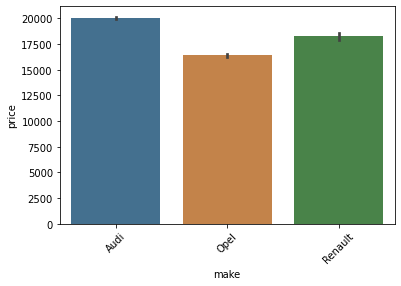

In [4]:
sns.barplot(x="make", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

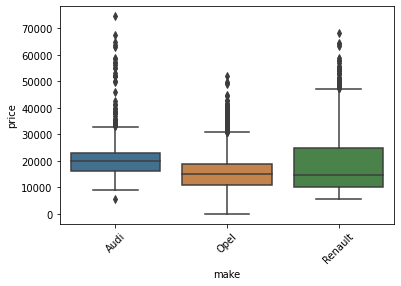

In [5]:
sns.boxplot(x="make", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "model" sütununda verilerde eksik yok.

In [21]:
# data["model"].value_counts(dropna=False) 

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

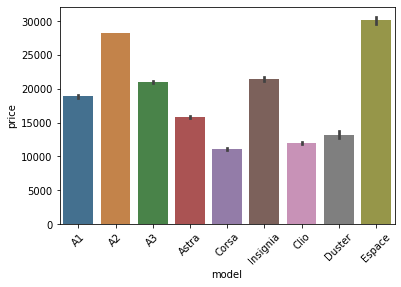

In [7]:
sns.barplot(x="model", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

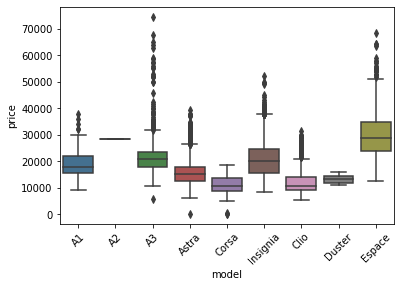

In [6]:
sns.boxplot(x="model", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "price" sütununda verilerde eksik yok.

In [5]:
# data["price"].value_counts(dropna=False) 

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: price, Length: 2956, dtype: int64

<AxesSubplot:>

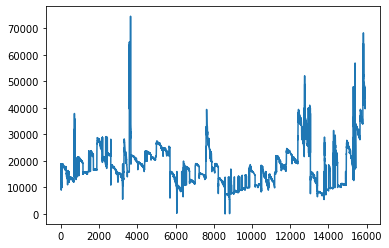

In [4]:
data["price"].plot()

### "body_type" sütununda 60 eksik değer var. Bunları "model" bazında "body_type" mode() ile doldurdum.

In [5]:
# data["body_type"].value_counts(dropna=False) 

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [ ]:
# data[~data["body_type"].notna()][["model","registration","model_code","body_type"]]

In [4]:
# 4. yöntem :

f= lambda x : x.mode().iloc[0]

data["body_type"] = data["body_type"].fillna(data.groupby("model")["body_type"].transform(f))

In [27]:
# data["body_type"].value_counts(dropna=False)  # 1.yöntemi kullanırsak.

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [32]:
# data["body_type"].value_counts(dropna=False)   # 3. ve 4. yöntemi kullanırsak aynı sonuca ulaşıyoruzb

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

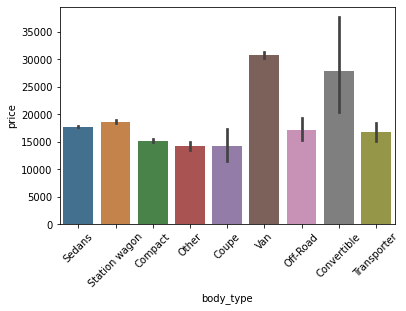

In [20]:
sns.barplot(x="body_type", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

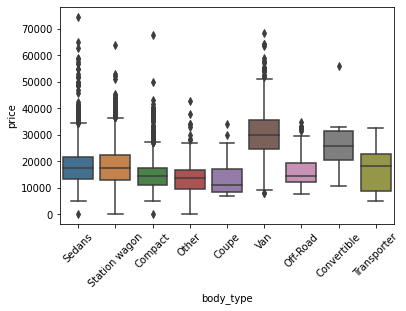

In [21]:
sns.boxplot(x="body_type", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "vehicle_condition" sütununda 2 eksik değer var. Değer sayısı az olduğundan dolayı "km", "price" ve "model" göre bazında manuel olarak used ile doldurdum.

In [7]:
# data["vehicle_condition"].value_counts(dropna=False) 

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64

In [11]:
# data.loc[~data["vehicle_condition"].notna()]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
2765,Audi,A3,Sedans,2.0,17900,NaN,115137.0,2016.0,NaN,110.0,NaN,NaN,NaN,White,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,968",4.0,NaN,Diesel,4.5,5.3,4.1,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."
5237,Audi,A3,Sedans,1.6,25400,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,Grey,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,598",4.0,NaN,Diesel,3.9,4.1,3.7,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."


In [5]:
data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"] = data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"].fillna("Used")

In [9]:
# data["vehicle_condition"].value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

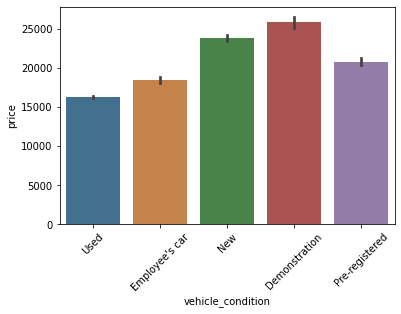

In [14]:
sns.barplot(x="vehicle_condition", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

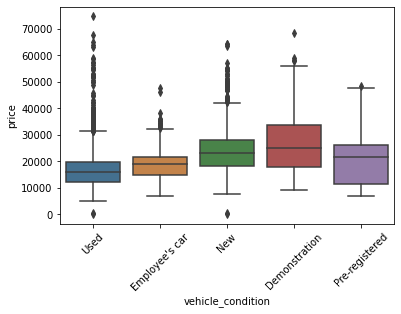

In [22]:
sns.boxplot(x="vehicle_condition", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "km" sütununda 1024 eksik değer var. Bunları önce "vehicle_condition" new olanları 0 ile doldurdum. Sonrasında ise "model", "body_type" ve "vehicle_condition" göre gruplandırıp "km" mean() ile doldurdum. 

In [10]:
# data["km"].value_counts(dropna=False)   

10.0        1045
NaN         1024
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6690, dtype: int64

In [6]:
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="New"),"km"] = 0   

In [24]:
# data.loc[(~data["km"].notna())]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
981,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
983,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,Grey,Uni/basic,Grigio Freccia,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1075,Audi,A1,Sedans,1.4,19999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1904,Audi,A1,Sedans,NaN,27650,VAT deductible,NaN,2019.0,NaN,85.0,Pre-registered,NaN,NaN,White,Metallic,Bianco,Cloth,Black,5.0,4.0,NaN,Automatic,999,3.0,"1,255",benzine,4.8,5.8,4.2,108.0,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Leather steering wheel,Multi-...","Bluetooth,Radio,USB",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Emergency brake assistant,..."
1934,Audi,A1,Sedans,NaN,28499,VAT deductible,NaN,2019.0,1.0,85.0,Pre-registered,1.0,NaN,Grey,Metallic,Grigio Chronos,NaN,NaN,5.0,5.0,NaN,Automatic,999,NaN,NaN,benzine,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Electrical side mirrors,Park Distance Control,Parking...",Bluetooth,Alloy wheels,"ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stabil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,Renault,Espace,Van,1.6,34150,VAT deductible,NaN,2018.0,NaN,118.0,Pre-registered,NaN,NaN,Grey,Metallic,Grigio scuro,Full leather,Beige,5.0,7.0,NaN,Automatic,"1,598",4.0,"1,659",Diesel,4.7,5.1,4.4,120.0,NaN,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,MP3,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Pas..."
15806,Renault,Espace,Van,NaN,40999,VAT deductible,NaN,2019.0,1.0,165.0,Demonstration,1.0,Yes,Black,Metallic,Black Pearl,Full leather,Brown,5.0,5.0,3333/BHJ,Automatic,"1,798",4.0,"1,685",benzine,6.8,8.7,5.7,153.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,Driver-side airbag,Electronic stability control,Em..."
15837,Renault,Espace,Van,NaN,47450,VAT deductible,NaN,2019.0,1.0,118.0,Pre-registered,1.0,NaN,Black,Metallic,amethyst black,Full leather,Black,5.0,5.0,NaN,Automatic,"1,598",4.0,"1,734",Diesel,4.7,5.1,4.4,123.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive Cruise Control,Blind spot monitor,Daytime

In [7]:
f= lambda x : x.mean()        

data["km"] = data["km"].fillna(data.groupby(["model","body_type","vehicle_condition"])["km"].transform(f))

In [8]:
data["km"] = np.round(data["km"], 1)

In [9]:
# data[~data["km"].notna()]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security,gears
7622,Opel,Astra,Coupe,NaN,29990,VAT deductible,NaN,2019.0,1.0,110.0,Demonstration,1.0,NaN,Blue,Metallic,tiefsee blau,Cloth,Other,5.0,NaN,NaN,Automatic,"1,399",4.0,"1,350",benzine,5.8,7.4,4.9,134.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,USB",Catalytic Converter,"ABS,Adaptive headlights,Central door lock,Dayt...",NaN
9519,Opel,Corsa,Transporter,1.2,9700,NaN,NaN,2019.0,NaN,51.0,Employee's car,NaN,NaN,Red,Uni/basic,Rosso,Cloth,Grey,5.0,4.0,NaN,Manual,"1,229",4.0,"1,163",benzine,5.3,6.6,4.5,124.0,Euro 6,"Air conditioning,Power windows",Radio,Touch screen,"ABS,Central door lock,Driver-side airbag,Elect...",5.0
15430,Renault,Espace,Sedans,NaN,30900,NaN,NaN,2018.0,NaN,118.0,Pre-registered,NaN,NaN,White,Uni/basic,Bianco,Part leather,Black,5.0,7.0,NaN,Automatic,"1,600",4.0,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",6.0
15545,Renault,Espace,Sedans,NaN,30900,NaN,NaN,2018.0,NaN,118.0,Pre-registered,NaN,NaN,White,Uni/basic,Bianco,Part leather,Black,5.0,7.0,NaN,Automatic,"1,600",4.0,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",6.0


In [ ]:
# data.groupby(["model", "body_type", "vehicle_condition"]).km.describe().head(100)

In [9]:
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="Demonstration"),"km"] = 0
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="Pre-registered"),"km"] = 10
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="Employee's car"),"km"] = 2000

In [28]:
# data.groupby(["model", "body_type", "vehicle_condition"]).price.describe()  #"registration" ilave edilebilir.

count  \
model    body_type     vehicle_condition           
A1       Compact       Demonstration        75.0   
                       Employee's car       79.0   
                       New                 248.0   
                       Pre-registered       19.0   
                       Used                618.0   
...                                          ...   
Insignia Station wagon Employee's car      115.0   
                       New                 206.0   
                       Pre-registered       51.0   
                       Used               1138.0   
         Van           Employee's car        1.0   

                                                  mean  \
model    body_type     vehicle_condition                 
A1       Compact       Demonstration      23404.546667   
                       Employee's car     19955.455696   
                       New                23432.568548   
                       Pre-registered     23055.000000   
                       Used               16758.276699   
...                                                ...   
Insignia Station wagon Employee's car     21677.852174   
                       New                31780.373786   
                       Pre-registered     31558.666667   
                       Used               18001.152021   
         Van           Employee's car     20980.000000   

                                                  std  \
model    body_type     vehicle_condition                
A1       Compact       Demonstration      4097.006937   
                       Employee's car     3803.376017   
                       New                3523.311326   
                       Pre-registered     2307.272921   
                       Used               3180.778682   
...                                               ...   
Insignia Station wagon Employee's car     2255.544841   
                       New                5634.808637   
                       Pre-registered     4564.469199   
                       Used               5038.105438   
         Van           Employee's car             NaN   

                                              min  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      14900.0   
                       Employee's car     13500.0   
                       New                16220.0   
                       Pre-registered     20885.0   
                       Used                9950.0   
...                                           ...   
Insignia Station wagon Employee's car     18490.0   
                       New                21992.0   
                       Pre-registered     20890.0   
                       Used                8290.0   
         Van           Employee's car     20980.0   

                                               25%  \
model    body_type     vehicle_condition             
A1       Compact       Demonstration      20970.00   
                       Employee's car     16684.50   
                       New                20800.75   
                       Pre-registered     21435.00   
                       Used               14890.00   
...                                            ...   
Insignia Station wagon Employee's car     19945.00   
                       New                26571.25   
                       Pre-registered     29995.00   
                       Used               14050.00   
         Van           Employee's car     20980.00   

                                              50%  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      22900.0   
                       Employee's car     19700.0   
                       New                22492.5   
                       Pre-registered     22140.0   
                       Used               15955.0   
...                                           ...   
Insignia Station wagon Employee's car     21390.0   

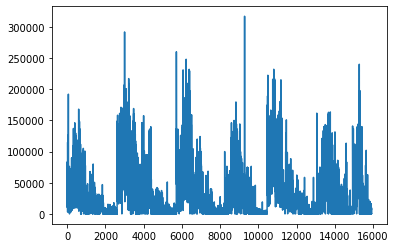

In [9]:
data["km"].plot();

<AxesSubplot:xlabel='km'>

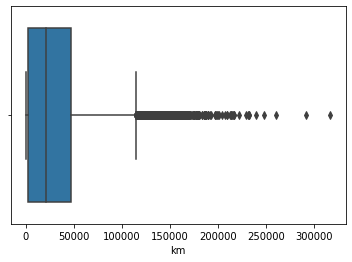

In [10]:
sns.boxplot(x=data.km)

Burada aykırı olabilecek değerleri belirledim.

Q1 = data.km.quantile(0.25)    
Q3 = data.km.quantile(0.75)     
IQR = Q3-Q1   

down_lev= Q1-1.5*IQR  
up_lev= Q3+1.5*IQR

(data.km< down_lev) | (data.km > up_lev)

outlier = ((data.km< down_lev) | (data.km > up_lev))

data[outlier]   # outlier olanları getirir.

Bu yöntem ile outlier olanları direkt olarak silebiliriz.

clean_data = data[~outlier]

clean_data.shape

In [ ]:
Bu yöntem ile outlier olanları ortalama ile doldurabiliriz.

data.km.mean()

data[outlier] = data.km.mean()

In [ ]:
Bu yöntem ile outlier olanlara baskılama yöntemini uyguluyorum yanı üst tarafta olanları üst değere
alt tarafta olanları ise alt tarafa eşitliyorum.

data.loc[(data.km < down_lev), "km"] = down_lev

data.loc[(data.km > up_lev), "km"] = up_lev

### "vat" sütununda 4513 eksik veri var. Bu veri diğer değişkenlerden bağımsız olduğundan dolayı herhangi bir sütun ile ilişkilendirilemedi. Bu özellik satın alan kişinin VAT indiriminden yararlanıp yararlanamayacağı ve arabanın registration ile ilgili olabileceğinden "vat" mode() ile doldurdum. 

In [37]:
# data["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [38]:
# data[~data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()  # 4513 eksik veri var.

count          mean          std      min      25%  \
model    body_type     vehicle_condition                                                       
A1       Compact       Employee's car       9.0  22753.333333  6209.092124  13500.0  16900.0   
                       New                 28.0  20807.785714  3514.105991  16220.0  18670.0   
                       Pre-registered       5.0  21760.000000   813.633824  20990.0  21190.0   
                       Used               215.0  15785.423256  2333.688421  11100.0  14425.0   
         Other         Used                 1.0  23490.000000          NaN  23490.0  23490.0   
...                                         ...           ...          ...      ...      ...   
Insignia Station wagon Demonstration       11.0  32386.363636  5699.382901  19200.0  28985.0   
                       Employee's car      15.0  22607.333333  2257.402004  20900.0  21090.0   
                       New                 36.0  28041.888889  4728.323368  21992.0  24203.0   
                       Pre-registered       7.0  32728.571429  2308.473006  30000.0  31150.0   
                       Used               238.0  16468.344538  4148.735883   9000.0  13857.5   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Employee's car     22990.0  28400.00  28600.0  
                       New                20091.0  21870.75  29181.0  
                       Pre-registered     21490.0  22140.00  22990.0  
                       Used               15500.0  16462.00  28750.0  
         Other         Used               23490.0  23490.00  23490.0  
...                                           ...       ...      ...  
Insignia Station wagon Demonstration      34490.0  36390.00  38590.0  
                       Employee's car     22500.0  22940.00  29900.0  
                       New                26682.0  30474.25  39977.0  
                       Pre-registered     32500.0  33700.00  36900.0  
                       Used               15594.5  18800.00  33900.0  

[112 rows x 8 columns]

In [39]:
# data[data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()

count          mean          std      min       25%  \
model    body_type     vehicle_condition                                                        
A1       Compact       Demonstration       75.0  23404.546667  4097.006937  14900.0  20970.00   
                       Employee's car      70.0  19595.728571  3275.708278  15444.0  16682.25   
                       New                220.0  23766.631818  3389.017250  17330.0  21165.00   
                       Pre-registered      14.0  23517.500000  2508.375777  20885.0  21435.00   
                       Used               403.0  17277.292804  3442.815152   9950.0  14969.50   
...                                         ...           ...          ...      ...       ...   
Insignia Station wagon Employee's car     100.0  21538.430000  2233.193194  18490.0  19900.00   
                       New                170.0  32572.052941  5502.435370  22167.0  27950.00   
                       Pre-registered      44.0  31372.545455  4819.147177  20890.0  29733.75   
                       Used               900.0  18406.494444  5174.766642   8290.0  14480.00   
         Van           Employee's car       1.0  20980.000000          NaN  20980.0  20980.00   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Demonstration      22900.0  26985.00  29197.0  
                       Employee's car     19225.0  21893.75  27400.0  
                       New                22590.0  27380.00  31990.0  
                       Pre-registered     23475.0  25257.50  28875.0  
                       Used               16445.0  19900.00  28900.0  
...                                           ...       ...      ...  
Insignia Station wagon Employee's car     20990.0  22760.00  32500.0  
                       New                33236.5  36860.25  52120.0  
                       Pre-registered     31200.0  33051.75  40450.0  
                       Used               18470.0  21800.00  44970.0  
         Van           Employee's car     20980.0  20980.00  20980.0  

[141 rows x 8 columns]

In [10]:
data["vat"] = data["vat"].fillna(data["vat"].mode()[0])

In [15]:
# data["vat"].value_counts(dropna=False)

VAT deductible      15493
Price negotiable      426
Name: vat, dtype: int64

### "registration" sütununda 1597 eksik veri var. Eksik verileri tamamlarken öncelikle "registration" dolu olanların yıllara göre "km" olarak ortalamalarını aldım. Ayrıca toplam yıllık ortalamanın 35000 olduğunu gördüm. Sonrasında ise 2018 ve 2019 yıllarının ortalaması olan 10000 km ve tüm veri setinin yıllara göre ortalaması olan 35000 km ye göre doldurma işlemi yaptım. "km"<10000 olanları 2019 yılı ile doldurdum. Sonrasında kalanları ise km/35000 yaparak buradan bir sayı buldum ve bunu 2019 yılından çıkararak çıkan yıl değeri ile doldurdum.

In [16]:
# data["registration"].value_counts(dropna=False)  

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: registration, dtype: int64

In [81]:
# data.loc[(~data["registration"].notna()) & (data["model_code"].notna()) & (data["km"]==0), ["model","body_type","model_code"]].head(100) # & (data["vehicle_condition"]=="New"),"km"]

,model,body_type,model_code
977,A1,Compact,0588/BHM
1064,A1,Compact,0588/BDB
1098,A1,Compact,0588/BHM
1395,A1,Sedans,0588/AUJ
1467,A1,Compact,0588/BHM
1698,A1,Compact,0588/BHM
2000,A1,Compact,0588/BNP
2014,A1,Compact,0588/BHM
2015,A1,Compact,0588/BNP
2097,A1,Compact,0588/BHM


In [11]:
data.loc[(~data["registration"].notna())&(data["km"]<10000), ["registration"]] = 2019    # 2018 ve 2019 yıllarının ortalamasını toplayıp 2 ye böldüğümüzde 10000 buldum.

data.loc[(~data["registration"].notna()), ["registration"]] = (2019 - data["km"]//35000)  # 4 yılın ortalamasına baktığımızda 35000 km buldum.

In [26]:
# data["registration"].value_counts(dropna=False)  

2018.0    4527
2019.0    4441
2016.0    3674
2017.0    3277
Name: registration, dtype: int64

In [9]:
# data.loc[(data["model_code"]=="0588/BNO")&(~data["registration"].notna()), "registration"] = 2019  # bu model arabaların 2019 model olduğunu gördük.

# data.loc[(data["model_code"]=="0588/BNN")&(~data["registration"].notna()), "registration"] = 2019   # bu model arabaların 2019 model olduğunu gördük.

# data.loc[(data["model_code"]=="3333/BJR")&(~data["registration"].notna()), "registration"] = 2019  # bu model arabaların 2019 model 

# data.loc[(data["vehicle_condition"]=="New")&(~data["registration"].notna())&(data["km"]<2000), ["registration"]]=2019

# registration dolu olan 2019 model orabaların km mean() 2000 olduğunu gördüm.
# Ve registration boş olanlardan aynı zamanda new olan ve  km si 2000 den küçük olanlara 2019 yılı atadım.

# data.loc[(~data["registration"].notna())&(data["km"]<2000), ["registration"]] = 2019

# registration dolu olan 2019 model orabaların km mean() 18000 olduğunu gördüm.
# Ve registration boş olanlardan km si 2000 den küçük olanlara 2019 yılı atadım.

# data.loc[(~data["registration"].notna())&(data["km"]<18000), ["registration"]] = 2018

# registration dolu olan 2018 model orabaların km mean() 18000 olduğunu gördüm.
# Ve registration boş olanlardan km si 18000 den küçük olanlara 2018 yılı atadım.

# data.loc[(~data["registration"].notna())&(data["km"]<42000), ["registration"]] = 2017

# registration dolu olan 2017 model orabaların km mean() 42000 olduğunu gördüm.
# Ve registration boş olanlardan km si 42000 den küçük olanlara 2017 yılı atadım.

# data.loc[~data["registration"].notna(),["registration"]] = 2016

# geri kalan boş değerleri de 2016 yılı ile doldurdum.


In [25]:
# data["registration"].value_counts(dropna=False)

2018.0    4531
2019.0    4425
2016.0    3681
2017.0    3282
Name: registration, dtype: int64

In [130]:
# data.loc[~data["registration"].notna()]["km"].mean()  # registration eksik olanların km olarak ortalaması.

593.0224787819358

In [132]:
# data.loc[data["registration"].notna()]["km"].mean()  # registration dolu olanların km olarak ortalaması.

35058.30276058325

In [118]:
# data.loc[(data["registration"].notna())&(data["registration"]==2019)]["km"].mean()  # registration 2019 olanların km olarak ortalaması.

1999.6694758608462

In [119]:
# data.loc[(data["registration"].notna())&(data["registration"]==2018)]["km"].mean()  # registration 2018 olanların km olarak ortalaması.

17985.679221107577

In [120]:
# data.loc[(data["registration"].notna())&(data["registration"]==2017)]["km"].mean() # registration 2017 olanların km olarak ortalaması.

41753.96848220789

In [131]:
# data.loc[(data["registration"].notna())&(data["registration"]==2016)]["km"].mean()  # registration 2016 olanların km olarak ortalaması.

77442.52095808383

In [113]:
# data[data["registration"].notna()].groupby(["model", "registration", "vehicle_condition"]).km.describe().head(50)

count          mean           std      min       25%  \
model registration vehicle_condition                                                         
A1    2016.0       Employee's car       5.0  48103.800000  30327.711242  26792.0  27000.00   
                   Used               624.0  54382.193910  26268.406892   3150.0  35202.75   
      2017.0       Demonstration        6.0  22963.500000  17802.676830  11940.0  15327.25   
                   Employee's car       8.0  17377.750000   5795.687282   9767.0  11816.75   
                   Pre-registered       1.0     10.000000           NaN     10.0     10.00   
                   Used               417.0  26086.731415  18740.903960    200.0  14300.00   
      2018.0       Demonstration       18.0   9860.666667   5351.243594   1050.0   5200.00   
                   Employee's car     131.0  12199.404580   7558.408070      1.0   6319.50   
                   Pre-registered      17.0    434.204152   1206.701934      9.0     80.00   
                   Used               578.0  14589.496540   7867.173729     10.0   8098.50   
      2019.0       Demonstration      108.0   3798.750000   2519.333665     10.0   2500.00   
                   Employee's car      52.0   4692.371860   4498.792418      1.0    536.25   
                   New                183.0      5.349727     23.982780      0.0      0.00   
                   Pre-registered     128.0     97.177849    320.710405      1.0      6.00   
                   Used               185.0   2864.691892   3824.875155      1.0     20.00   
A2    2018.0       Employee's car       1.0  26166.000000           NaN  26166.0  26166.00   
A3    2016.0       Employee's car       8.0  56954.625000  26796.572462   7790.0  40700.00   
                   Used               810.0  90420.275309  36408.836898     35.0  63014.50   
      2017.0       Demonstration        5.0  27950.000000   9145.354012  16000.0  23000.00   
                   Employee's car      32.0  31584.750000  14949.531463     59.0  23750.00   
                   Used               638.0  44593.115987  27748.116927     15.0  25783.50   
      2018.0       Demonstration       16.0  12801.187500  10920.150153   1015.0   4562.25   
                   Employee's car     157.0  18197.566879   8303.326959      1.0  12000.00   
                   New                  1.0      7.000000           NaN      7.0      7.00   
                   Pre-registered      17.0   1421.764706   3974.791528      1.0     10.00   
                   Used               586.0  19202.484478  11466.789776      1.0  12151.00   
      2019.0       Demonstration       41.0   4971.878049   3092.353369     50.0   3000.00   
                   Employee's car      31.0   3869.451613   5402.688028     10.0    100.00   
                   New                 23.0     27.217391     36.339256      0.0      7.00   
                   Pre-registered     278.0    226.564262    974.453785      1.0     10.00   
                   Used               146.0   4389.342466  12986.967706      1.0     27.00   
Astra 2016.0       Employee's car       1.0  95000.000000           NaN  95000.0  95000.00   
                   Used               518.0  89122.942085  42132.114849  10027.0  57938.50   
      2017.0       Demonstration        1.0  68500.000000           NaN  68500.0  68500.00   
                   Employee's car      12.0  52783.000000  20954.520302  14300.0  38500.00   
                   Pre-registered       1.0   4000.000000           NaN   4000.0   4000.00   
                   Used               573.0  49971.043630  31337.081636     30.0  25000.00   
      2018.0       Demonstration       16.0   7319.937500   7499.404034    100.0   2160.50   
                   Employee's car     121.0  23088.033058   8072.127016     50.0  20040.00   
                   Pre-registered       3.0    816.666667    728.583100     50.0    475.00   
                   Used               587.0  21869.556233  11413.991791      5.0  14000.00

In [ ]:
# data[data["registration"].notna()].groupby(["model", "registration", "vehicle_condition"])

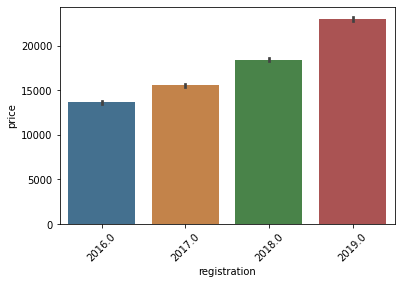

In [27]:
sns.barplot(x="registration", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

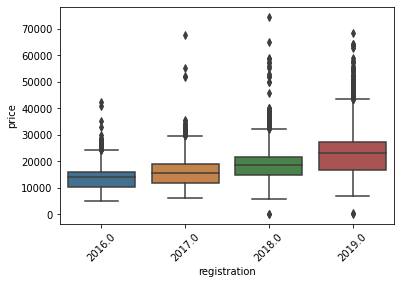

In [28]:
sns.boxplot(x="registration", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "prev_owners" sütununda 6828 eksik veri var. Bunu 2 şekilde doldurabiliriz. Burada önce "vehicle_condition" new olanları 0 ile doldurdum. Sonra kalanları ise "registration", "vehicle_condition" göre gruplandırıp "prev_owners" mode() ile doldurdum. 

In [53]:
# data["prev_owner"].value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [78]:
# data[data["prev_owner"].notna()].groupby("registration")["prev_owner"].mean()

registration
2016.0    1.172414
2017.0    1.155335
2018.0    1.024598
2019.0    1.006285
Name: prev_owner, dtype: float64

In [12]:
data.loc[(~data["prev_owner"].notna()) & (data["vehicle_condition"]=="New"), "prev_owner"] = 0  # 1635 satır. 

# New olduklarından dolayı prev_owner 0 atadık. 

In [51]:
# data[~data["prev_owner"].notna()].groupby("registration")["km"].mean()

# Sonrasında boş olanların registration göre km mean() hesapladık.

registration
2016.0    74932.490185
2017.0    42697.169564
2018.0    18098.776297
2019.0     2109.444040
Name: km, dtype: float64

In [57]:
# data[data["prev_owner"].notna()].groupby(["registration","vehicle_condition"])["prev_owner"].describe()

# Yeni durumda registration göre prev_owner istatistik değerlerine baktım. 

count  \
registration vehicle_condition           
2016.0       Demonstration         1.0   
             Employee's car        9.0   
             Pre-registered        1.0   
             Used               2425.0   
2017.0       Demonstration        22.0   
             Employee's car       28.0   
             Pre-registered        6.0   
             Used               1959.0   
2018.0       Demonstration       100.0   
             Employee's car      541.0   
             New                   3.0   
             Pre-registered       99.0   
             Used               2308.0   
2019.0       Demonstration       391.0   
             Employee's car       73.0   
             New                1647.0   
             Pre-registered      739.0   
             Used                374.0   

                                    mean  \
registration vehicle_condition             
2016.0       Demonstration      1.000000   
             Employee's car     1.000000   
             Pre-registered     1.000000   
             Used               1.173196   
2017.0       Demonstration      1.136364   
             Employee's car     1.000000   
             Pre-registered     1.000000   
             Used               1.158244   
2018.0       Demonstration      1.020000   
             Employee's car     1.016636   
             New                0.333333   
             Pre-registered     1.010101   
             Used               1.027296   
2019.0       Demonstration      1.002558   
             Employee's car     1.013699   
             New                0.008500   
             Pre-registered     1.006766   
             Used               1.008021   

                                     std  \
registration vehicle_condition             
2016.0       Demonstration           NaN   
             Employee's car     0.000000   
             Pre-registered          NaN   
             Used               0.392408   
2017.0       Demonstration      0.351250   
             Employee's car     0.000000   
             Pre-registered     0.000000   
             Used               0.378795   
2018.0       Demonstration      0.140705   
             Employee's car     0.128021   
             New                0.577350   
             Pre-registered     0.100504   
             Used               0.162981   
2019.0       Demonstration      0.050572   
             Employee's car     0.117041   
             New                0.091832   
             Pre-registered     0.082032   
             Used               0.089322   

                                min  \
registration vehicle_condition        
2016.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2017.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2018.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   
2019.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   

                                25%  \
registration vehicle_condition        
2016.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2017.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2018.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   
2019.0       Demonstration      1.0   
             Employee's c

In [13]:
# 1. yöntem olarak registration ve vehicle_condition göre gruplandırıp bunun prev_owner değerlerinin mode() nan değerlere atadım.

f= lambda x : x.mode().iloc[0]

data["prev_owner"] = data["prev_owner"].fillna(data.groupby(["registration","vehicle_condition"])["prev_owner"].transform(f))

In [57]:
# data["prev_owner"].value_counts(dropna=False)  # 1. yönteme göre çıkan değerler.

1.0    13487
0.0     1635
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [30]:
# data["prev_owner"].apply(np.round).value_counts(dropna=False)   # 1. yöntemde mode() yerine mean() kullanırsak çıkan değerler.

1.0    13376
0.0     1635
2.0      866
NaN       23
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [80]:
# 2. yöntem olarak da prev_owner boş olanların registration=2019 olanlara 0, diğerlerine 1 atadım.

# data.loc[(~data["prev_owner"].notna()) & (data["registration"]== 2019),"prev_owner"] = 0

# data.loc[(~data["prev_owner"].notna()) & (data["registration"]< 2019),"prev_owner"] = 1

In [82]:
# data["prev_owner"].value_counts(dropna=False) # 2. yönteme göre de çıkan değerler aşağıdaki gibi oldu. 

1.0    12286
0.0     2836
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

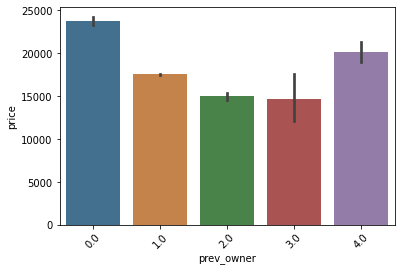

In [31]:
sns.barplot(x="prev_owner", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

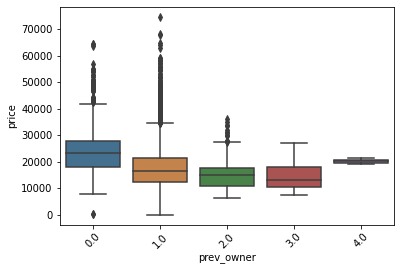

In [32]:
sns.boxplot(x="prev_owner", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

### "power_hp" sütununda 88 eksik veri var. Öncelikle içinde çok düşük bazı değerlerin olduğunu gördüm(1, 4, 9). Ancak çok büyük değerler olan 239, 270, 294 gibi olanları incelediğimizde gerçekçi olduklarını gördüm. "Model", "body_type" ve "registration" göre gruplandırıp "power_hp" mean() değerlere baktım. 1,4 ve 9 olanları np.nan ile doldurdum. Burada eksik değerleri "model", "body_type" ve "registration" bazında bunları "power_hp" mode() ile doldurdum.

In [58]:
# data["power_hp"].value_counts(dropna=False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
1.0        20
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
98.0        3
93.0        3
80.0        3
168.0       3
150.0       2
63.0        2
140.0       2
86.0        2
89.0        2
40.0        2
167.0       2
53.0        2
228.0       2
127.0       2
143.0       2
270.0       2
9.0         1
44.0        1
123.0       1
195.0 

In [14]:
data.loc[(data["power_hp"]<50), "power_hp"] = np.nan 

In [15]:
f= lambda x : x.mode().iloc[0]

data["power_hp"] = data["power_hp"].fillna(data.groupby(["model","body_type","registration"])["power_hp"].transform(f))

In [23]:
# data.groupby(["model","body_type","registration"])["power_hp"].mean().head(100)

model  body_type      registration
A1     Compact        2016.0           72.940171
                      2017.0           77.267081
                      2018.0           71.382022
                      2019.0           83.639257
       Coupe          2016.0           70.000000
                      2017.0           85.000000
       Other          2017.0          140.000000
                      2018.0           76.666667
                      2019.0           75.000000
       Sedans         2016.0           74.097686
                      2017.0           73.936090
                      2018.0           74.010799
                      2019.0           82.442857
       Station wagon  2016.0           74.600000
                      2017.0           89.333333
                      2018.0           69.727273
                      2019.0           85.000000
       Van            2019.0          147.000000
A2     Off-Road       2018.0           85.000000
A3     Compact        2016.0      

In [40]:
# data.loc[(data["power_hp"]<50)|(data["power_hp"]>230)] 

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security,gears
3587,Audi,A3,Sedans,2.5,64900,VAT deductible,35000.0,2018.0,1.0,294.0,Used,NaN,NaN,Grey,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0
3590,Audi,A3,Sedans,NaN,62900,VAT deductible,700.0,2019.0,1.0,294.0,Used,NaN,NaN,Grey,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,194.0,Euro 6d-TEMP,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0
3592,Audi,A3,Sedans,2.5,56900,VAT deductible,5200.0,2018.0,1.0,294.0,Used,1.0,NaN,Grey,NaN,DAYTONA PERLATO,Full leather,Black,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0
3593,Audi,A3,Sedans,2.5,58500,VAT deductible,10000.0,2018.0,1.0,294.0,Used,NaN,NaN,White,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0
3595,Audi,A3,Station wagon,2.5,63900,VAT deductible,10.0,2019.0,1.0,294.0,Used,1.0,NaN,Black,Metallic,Mytoss nero,Part leather,Black,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0
3596,Audi,A3,Sedans,2.5,57400,Price negotiable,63000.0,2018.0,1.0,294.0,Used,NaN,NaN,Blue,Metallic,NaN,Full leather,Black,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0
3598,Audi,A3,Sedans,2.5,55000,VAT deductible,24000.0,2017.0,1.0,294.0,Used,NaN,NaN,Black,Metallic,NaN,NaN,NaN,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0
3599,Audi,A3,Sedans,2.5,55000,VAT deductible,30000.0,2018.0,1.0,294.0,Used,NaN,NaN,Grey,NaN,NaN,NaN,NaN,4.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,590",benzine,8.3,11.0,6.5,188.0,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0
3600,Audi,A3,Sedans,2.5,53000,VAT deductible,4000.0,2018.0,1.0,294.0,Used,NaN,NaN,Black,NaN,NaN,NaN,NaN,4.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,590",benzine,8.3,11.0,6.5,188.0,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","Adaptive Cruise Control,Adaptive headlights,Al...",7.0
3601,Audi,A3,Sedans,2.5,51900,VAT deductible,19000.0,2017.0,1.0,294.0,Used,NaN,NaN,Black,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Semi-automatic,"2,480",5.0,"1,585",benzine,8.3,11.0,6.6,189.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruis

In [93]:
# data.loc[data["power_hp"].notna()].groupby(["model","body_type","registration"])["power_hp"].describe()

count  \
model    body_type     registration          
A1       Compact       2016.0        234.0   
                       2017.0        161.0   
                       2018.0        269.0   
                       2019.0        373.0   
         Coupe         2016.0          1.0   
...                                    ...   
Insignia Station wagon 2016.0        435.0   
                       2017.0        305.0   
                       2018.0        481.0   
                       2019.0        390.0   
         Van           2018.0          1.0   

                                           mean  \
model    body_type     registration               
A1       Compact       2016.0         72.940171   
                       2017.0         77.267081   
                       2018.0         71.371747   
                       2019.0         83.745308   
         Coupe         2016.0         70.000000   
...                                         ...   
Insignia Station wagon 2016.0        110.416092   
                       2017.0        112.114754   
                       2018.0        116.609148   
                       2019.0        126.141026   
         Van           2018.0        121.000000   

                                           std  \
model    body_type     registration              
A1       Compact       2016.0        10.038373   
                       2017.0        12.012888   
                       2018.0        10.450099   
                       2019.0        12.670642   
         Coupe         2016.0              NaN   
...                                        ...   
Insignia Station wagon 2016.0        15.543879   
                       2017.0        19.466147   
                       2018.0         9.870043   
                       2019.0        20.770706   
         Van           2018.0              NaN   

                                       min  \
model    body_type     registration          
A1       Compact       2016.0         60.0   
                       2017.0         60.0   
                       2018.0         60.0   
                       2019.0         70.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0         88.0   
                       2017.0          1.0   
                       2018.0        100.0   
                       2019.0         81.0   
         Van           2018.0        121.0   

                                       25%  \
model    body_type     registration          
A1       Compact       2016.0         66.0   
                       2017.0         70.0   
                       2018.0         66.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0        100.0   
                       2017.0        100.0   
                       2018.0        103.0   
                       2019.0        104.0   
         Van           2018.0        121.0   

                                       50%  \
model    body_type     registration          
A1       Compact       2016.0         70.0   
                       2017.0         70.0   
                       2018.0         70.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0        100.0   
                       2017.0        121.0   
                       2018.0        121.0   
                       2019.0        125.0   
         Van           2018.0        121.0   

                                       75%  \
model    body_type     registration          
A1       Compact       2016.0         81.5   
                       2017.0         92.0   
                       2018.0         70.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
... 

In [34]:
# data["power_hp"].value_counts(dropna=False)

85.0     2544
66.0     2124
81.0     1403
100.0    1313
110.0    1113
70.0      889
125.0     710
51.0      695
55.0      592
118.0     548
92.0      466
121.0     394
147.0     380
77.0      353
56.0      290
54.0      276
103.0     253
87.0      234
165.0     196
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
78.0       20
1.0        20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
76.0        4
65.0        4
90.0        4
80.0        3
98.0        3
168.0       3
93.0        3
149.0       3
150.0       2
89.0        2
63.0        2
86.0        2
53.0        2
270.0       2
127.0       2
228.0       2
40.0        2
143.0       2
167.0       2
140.0       2
239.0       1
44.0        1
195.0       1
132.0       1
133.0 

<AxesSubplot:>

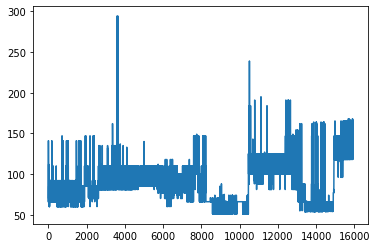

In [14]:
# data["power_hp"].plot()

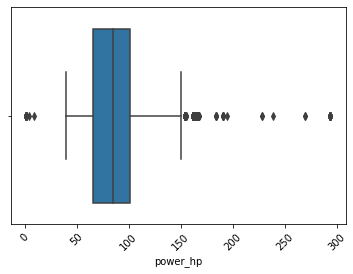

In [38]:
sns.boxplot(x="power_hp", data=data)
plt.xticks(rotation = 45);

### "Inspection_new" sütununda 11987 eksik veri var. Burada eksik değerleri model, registration, vehicle_condition göre gruplandırıp bunların price olarak istatistik değerlerini incelediğimizde mua. yapılmayanların used özellikte araçlar olduğunu ve bunların fiyatlarının az da olsa mua. yapılanlara göre daha düşük olduğunu gördüm. Dolayısıyla eksik değerleri muayenesi yeni olmayan olarak değerlendirip bunları No ile doldurdum.

In [65]:
# data["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [66]:
# data.loc[data["Inspection_new"].notna()].groupby(["model","registration","vehicle_condition"])["price"].describe()

count  \
model    registration vehicle_condition          
A1       2016.0       Used               223.0   
         2017.0       Demonstration        2.0   
                      Pre-registered       1.0   
                      Used                96.0   
         2018.0       Demonstration       10.0   
                      Employee's car      36.0   
                      Pre-registered       2.0   
                      Used               222.0   
         2019.0       Demonstration       49.0   
                      Employee's car      17.0   
                      New                103.0   
                      Pre-registered       5.0   
                      Used                22.0   
A3       2016.0       Used               154.0   
         2017.0       Demonstration        1.0   
                      Used               101.0   
         2018.0       Demonstration       13.0   
                      Employee's car       8.0   
                      Pre-registered       1.0   
                      Used                62.0   
         2019.0       Demonstration       25.0   
                      Employee's car       5.0   
                      New                108.0   
                      Pre-registered      20.0   
                      Used                21.0   
Astra    2016.0       Used               178.0   
         2017.0       Used               154.0   
         2018.0       Demonstration        1.0   
                      Employee's car      18.0   
                      Used               205.0   
         2019.0       Demonstration       32.0   
                      Employee's car      16.0   
                      New                 81.0   
                      Pre-registered      58.0   
                      Used                56.0   
Clio     2016.0       Used                34.0   
         2017.0       Used                36.0   
         2018.0       Demonstration        8.0   
                      Employee's car      23.0   
                      New                  1.0   
                      Pre-registered       9.0   
                      Used                70.0   
         2019.0       Demonstration        4.0   
                      New                 17.0   
                      Pre-registered      30.0   
                      Used                 5.0   
Corsa    2016.0       Used               131.0   
         2017.0       Used                64.0   
         2018.0       Demonstration        3.0   
                      Employee's car      14.0   
                      Pre-registered       6.0   
                      Used               133.0   
         2019.0       Demonstration       23.0   
                      Employee's car       9.0   
                      New                 50.0   
                      Pre-registered     173.0   
                      Used                63.0   
Espace   2016.0       Used                35.0   
         2017.0       Used                 6.0   
         2018.0       Demonstration        8.0   
                      Employee's car      11.0   
                      Pre-registered       1.0   
                      Used                22.0   
         2019.0       Demonstration       15.0   
                      Employee's car       1.0   
                      New                 16.0   
                      Pre-registered      54.0   
                      Used                 8.0   
Insignia 2016.0       Used               157.0   
         2017.0       Demonstration        3.0   
                      Employee's car       1.0   
                      Used               127.0   
         2018.0       Demonstration        1.0   
                      Employee's car      31.0   
                      Pre-registered       1.0   
                      Used               277.0   
         2019.0       Demonstration       44.0   
                      Employee's car       1.0   
                      New                

In [67]:
# data.loc[~data["Inspection_new"].notna()].groupby(["model","registration","vehicle_condition"])["price"].describe()

count  \
model    registration vehicle_condition          
A1       2016.0       Employee's car       5.0   
                      Used               401.0   
         2017.0       Demonstration        4.0   
                      Employee's car       8.0   
                      Used               323.0   
...                                        ...   
Insignia 2019.0       Demonstration      117.0   
                      Employee's car       4.0   
                      New                293.0   
                      Pre-registered      52.0   
                      Used                59.0   

                                                 mean  \
model    registration vehicle_condition                 
A1       2016.0       Employee's car     16740.000000   
                      Used               14474.623441   
         2017.0       Demonstration      17414.750000   
                      Employee's car     18943.750000   
                      Used               16549.117647   
...                                               ...   
Insignia 2019.0       Demonstration      34939.649573   
                      Employee's car     28572.500000   
                      New                31096.184300   
                      Pre-registered     30689.557692   
                      Used               31260.745763   

                                                 std  \
model    registration vehicle_condition                
A1       2016.0       Employee's car     2609.214441   
                      Used               1865.071488   
         2017.0       Demonstration      1935.974410   
                      Employee's car     2014.312626   
                      Used               2151.746899   
...                                              ...   
Insignia 2019.0       Demonstration      3714.650773   
                      Employee's car     5890.078522   
                      New                6204.521285   
                      Pre-registered     3259.828243   
                      Used               5008.888364   

                                             min  \
model    registration vehicle_condition            
A1       2016.0       Employee's car     13500.0   
                      Used                8999.0   
         2017.0       Demonstration      15869.0   
                      Employee's car     15750.0   
                      Used               10999.0   
...                                          ...   
Insignia 2019.0       Demonstration      22999.0   
                      Employee's car     19900.0   
                      New                19902.0   
                      Pre-registered     22990.0   
                      Used               21900.0   

                                              25%  \
model    registration vehicle_condition             
A1       2016.0       Employee's car     14300.00   
                      Used               13380.00   
         2017.0       Demonstration      15952.25   
                      Employee's car     18712.50   
                      Used               15195.00   
...                                           ...   
Insignia 2019.0       Demonstration      32990.00   
                      Employee's car     27400.00   
                      New                25692.00   
                      Pre-registered     28937.50   
                      Used               27095.00   

                                             50%  \
model    registration vehicle_condition            
A1       2016.0       Employee's car     18500.0   
                      Used               13999.0   
         2017.0       Demonstration      16900.0   
                      Employee's car     19700.0   
                      Used               15850.0   
...                                          ...   
Insignia 2019.0       Demonstration      35150.0   
                      Employee's car     30945.0   
                      New       

In [16]:
data.loc[~data["Inspection_new"].notna(), "Inspection_new"] = "No"

In [70]:
# data["Inspection_new"].value_counts(dropna=False)

No     11987
Yes     3932
Name: Inspection_new, dtype: int64

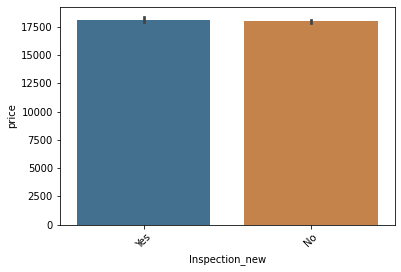

In [40]:
sns.barplot(x="Inspection_new", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

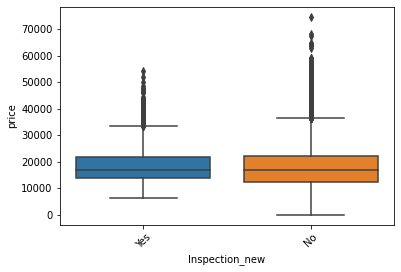

In [42]:
sns.boxplot(x="Inspection_new", y="price", data=data)
plt.xticks(rotation = 45);

### "body_color" sütununda 597 eksik veri var. Eksik değerlerin hangi "model" ve "body_type" olduklarına baktık. "Body_type" eksik olanların fiyatları daha yüksek olduğundan tercih edilen renkler olabileceğini değerlendirdim. Eksik değerleri  "model" göre en çok tercih edilen renkler ile doldurdum. ve sonrasında tercih edilmeyen renkleri gruplandırdım. Diğerlerini olduğu gibi bıraktım.

In [75]:
# data["body_color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [161]:
# data[~data["body_color"].notna()][["model","body_type"]].value_counts()  # boş olanların hangi model ve type olduklarına baktım.

model     body_type    
Insignia  Station wagon    103
          Sedans           103
Astra     Station wagon     75
A3        Sedans            60
Astra     Sedans            52
A1        Compact           44
          Sedans            29
Clio      Compact           24
Corsa     Compact           19
Espace    Van               14
Clio      Station wagon     13
Astra     Compact           10
Corsa     Sedans             9
A3        Station wagon      7
Clio      Sedans             7
Insignia  Other              6
A3        Compact            5
Insignia  Off-Road           4
Espace    Coupe              2
          Station wagon      2
          Sedans             2
Astra     Other              2
Clio      Transporter        2
Insignia  Compact            1
          Coupe              1
A3        Other              1
dtype: int64

In [163]:
# data.loc[~data["body_color"].notna()].groupby(["model","body_type"])["price"].describe()   # "registration" ilave edilebilir.

count  \
model    body_type              
A1       Compact         44.0   
         Sedans          29.0   
A3       Compact          5.0   
         Other            1.0   
         Sedans          60.0   
         Station wagon    7.0   
Astra    Compact         10.0   
         Other            2.0   
         Sedans          52.0   
         Station wagon   75.0   
Clio     Compact         24.0   
         Sedans           7.0   
         Station wagon   13.0   
         Transporter      2.0   
Corsa    Compact         19.0   
         Sedans           9.0   
Espace   Coupe            2.0   
         Sedans           2.0   
         Station wagon    2.0   
         Van             14.0   
Insignia Compact          1.0   
         Coupe            1.0   
         Off-Road         4.0   
         Other            6.0   
         Sedans         103.0   
         Station wagon  103.0   

                                mean  \
model    body_type                     
A1       Compact        20291.840909   
         Sedans         20377.310345   
A3       Compact        23464.000000   
         Other          12550.000000   
         Sedans         22490.133333   
         Station wagon  23365.857143   
Astra    Compact        16636.600000   
         Other           9507.500000   
         Sedans         19019.846154   
         Station wagon  18895.013333   
Clio     Compact        13734.541667   
         Sedans         13958.857143   
         Station wagon  12232.230769   
         Transporter     8390.000000   
Corsa    Compact        11166.263158   
         Sedans         11116.888889   
Espace   Coupe          30567.000000   
         Sedans         25995.000000   
         Station wagon  33810.000000   
         Van            32822.428571   
Insignia Compact        19900.000000   
         Coupe          17094.000000   
         Off-Road       32854.750000   
         Other          18556.666667   
         Sedans         25789.184466   
         Station wagon  26716.689320   

                                std  \
model    body_type                    
A1       Compact        3456.615867   
         Sedans         3872.914693   
A3       Compact        4847.017021   
         Other                  NaN   
         Sedans         2531.806480   
         Station wagon  1541.732189   
Astra    Compact        1098.444881   
         Other          1438.962300   
         Sedans         3885.477498   
         Station wagon  4124.452932   
Clio     Compact        2655.964395   
         Sedans         4441.847905   
         Station wagon  2350.712770   
         Transporter    1414.213562   
Corsa    Compact        1855.313626   
         Sedans         2421.023102   
Espace   Coupe          5052.985058   
         Sedans            0.000000   
         Station wagon  6335.676759   
         Van            7726.647514   
Insignia Compact                NaN   
         Coupe                  NaN   
         Off-Road       1387.646058   
         Other          1784.944444   
         Sedans         4709.351872   
         Station wagon  5362.412137   

                            min  \
model    body_type                
A1       Compact        15100.0   
         Sedans         12980.0   
A3       Compact        14990.0   
         Other          12550.0   
         Sedans         14999.0   
         Station wagon  21854.0   
Astra    Compact        15816.0   
         Other           8490.0   
         Sedans          9990.0   
         Station wagon   8440.0   
Clio     Compact         9890.0   
         Sedans          9971.0   
         Station wagon   9900.0   
         Transporter     7390.0   
Corsa    Compact         6450.0   
         Sedans          6490.0   
Espace   Coupe          26994.0   
         Sedans         25995.0   
         Station wagon  29330.0   
         Van            22990.0   
Insignia Compact        19900.0   
         Coupe          17094.0   
         Off-Road       31505.0   
         O

In [164]:
# data.loc[data["body_color"].notna()].groupby(["model","body_type"])["price"].describe()

count  \
model    body_type               
A1       Compact         995.0   
         Coupe             2.0   
         Other            13.0   
         Sedans         1509.0   
         Station wagon    21.0   
         Van               1.0   
A2       Off-Road          1.0   
A3       Compact         177.0   
         Convertible       8.0   
         Coupe             4.0   
         Other            15.0   
         Sedans         2545.0   
         Station wagon   275.0   
Astra    Compact         175.0   
         Coupe             2.0   
         Off-Road          1.0   
         Other            65.0   
         Sedans         1001.0   
         Station wagon  1143.0   
Clio     Compact         460.0   
         Coupe             1.0   
         Off-Road          2.0   
         Other            51.0   
         Sedans          926.0   
         Station wagon   324.0   
         Transporter      27.0   
         Van               2.0   
Corsa    Compact        1213.0   
         Coupe            13.0   
         Off-Road          3.0   
         Other            87.0   
         Sedans          866.0   
         Transporter       7.0   
         Van               2.0   
Duster   Off-Road         34.0   
Espace   Compact           6.0   
         Off-Road          8.0   
         Other             8.0   
         Sedans           19.0   
         Station wagon    89.0   
         Transporter      52.0   
         Van             789.0   
Insignia Compact          26.0   
         Off-Road          3.0   
         Other            42.0   
         Sedans          797.0   
         Station wagon  1511.0   
         Van               1.0   

                                mean  \
model    body_type                     
A1       Compact        19140.621106   
         Coupe          14925.000000   
         Other          22026.153846   
         Sedans         18597.990060   
         Station wagon  17811.380952   
         Van            29000.000000   
A2       Off-Road       28200.000000   
A3       Compact        18899.062147   
         Convertible    27905.375000   
         Coupe          17745.000000   
         Other          20910.666667   
         Sedans         21124.352063   
         Station wagon  20616.098182   
Astra    Compact        16174.800000   
         Coupe          22240.000000   
         Off-Road       18590.000000   
         Other          13998.369231   
         Sedans         15804.390609   
         Station wagon  15558.244094   
Clio     Compact        12593.030435   
         Coupe          17990.000000   
         Off-Road       12845.000000   
         Other          12105.823529   
         Sedans         11945.757019   
         Station wagon  11082.509259   
         Transporter     8497.592593   
         Van             9650.000000   
Corsa    Compact        11800.640561   
         Coupe           8772.307692   
         Off-Road        8166.666667   
         Other           9761.149425   
         Sedans         10196.312933   
         Transporter     7650.000000   
         Van             7900.000000   
Duster   Off-Road       13230.176471   
Espace   Compact        30046.666667   
         Off-Road       25762.500000   
         Other          29608.875000   
         Sedans         30479.526316   
         Station wagon  27168.696629   
         Transporter    22606.480769   
         Van            30891.405577   
Insignia Compact        28924.307692   
         Off-Road       24913.333333   
         Other          18203.666667   
         Sedans         20678.590966   
         Station wagon  21165.484447   
         Van            20980.000000   

                                 std  \
model    body_type                     
A1       Compact         4594.831094   
         Coupe           1378.858223   
         Other           3413.633300   
         Sedans          4458.098472   
         Station wagon   4360.610089   
         Van                     NaN   
A2 

In [17]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler modele göre en çok tercih edilen black, grey, white ile dolduruldu.

data["body_color"] = data["body_color"].fillna(data.groupby(["model"])["body_color"].transform(f))

In [18]:
data["body_color"] = data["body_color"].apply(lambda x : "other" if x in ["Brown", "Green", "Beige", "Yellow","Violet","Bronze", "Orange" ,"Gold"] else x)

In [47]:
# data["body_color"].value_counts(dropna=False)

Black     3957
Grey      3771
White     3525
Silver    1647
Blue      1431
Red        957
other      631
Name: body_color, dtype: int64

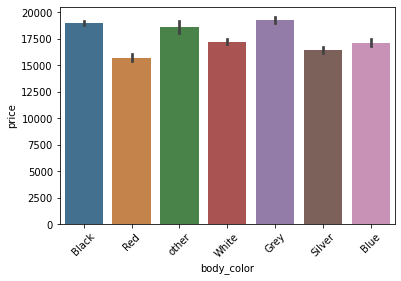

In [48]:
sns.barplot(x="body_color", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

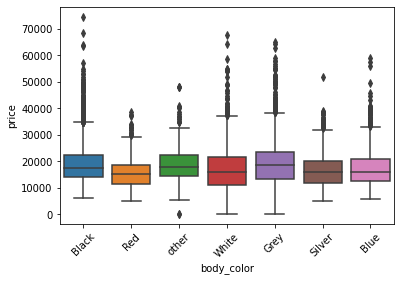

In [49]:
sns.boxplot(x="body_color", y="price", data=data)
plt.xticks(rotation = 45);

### "paintwork" sütunundaki nan değerleri dolduralım. 5772 eksik veri var. Burada eksik değerleri model, body_type ve registration göre gruplandırıp bunların price değerlerini incelediğimde ne kadar başka faktörlerde olsa boş olanların fiyatlarının dolu olanlara göre düşük olduğunu gördüm. Ancak buradan bunların metallic olmayanlar olabileceğini değerlendirmeme rağmen "model" e göre gruplandırıp "paintwork" mode() ile doldurdum. Ama bunların aksine  metallic olmayan olarak doldurup sonrasında bunun etkisi ile karşılaştırma yapılabilir!!!

In [199]:
# data["paintwork"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paintwork, dtype: int64

In [21]:
f= lambda x : x.mode().iloc[0]   

data["paintwork"] = data["paintwork"].fillna(data.groupby(["model"])["paintwork"].transform(f))

In [202]:
# data.loc[~data["paintwork"].notna()].groupby(["model","body_type","registration"])["price"].describe() 

count  \
model    body_type     registration          
A1       Compact       2016.0         58.0   
                       2017.0         52.0   
                       2018.0         58.0   
                       2019.0        143.0   
         Other         2017.0          1.0   
...                                    ...   
Insignia Sedans        2019.0        131.0   
         Station wagon 2016.0        118.0   
                       2017.0        121.0   
                       2018.0         70.0   
                       2019.0        141.0   

                                             mean  \
model    body_type     registration                 
A1       Compact       2016.0        14007.948276   
                       2017.0        15750.115385   
                       2018.0        17514.982759   
                       2019.0        22176.181818   
         Other         2017.0        23490.000000   
...                                           ...   
Insignia Sedans        2019.0        27755.167939   
         Station wagon 2016.0        13113.618644   
                       2017.0        17142.016529   
                       2018.0        21348.485714   
                       2019.0        31057.531915   

                                             std  \
model    body_type     registration                
A1       Compact       2016.0        1921.948777   
                       2017.0        1218.357825   
                       2018.0        2363.896378   
                       2019.0        3268.530931   
         Other         2017.0                NaN   
...                                          ...   
Insignia Sedans        2019.0        4897.482573   
         Station wagon 2016.0        2062.133195   
                       2017.0        2653.186261   
                       2018.0        1817.755167   
                       2019.0        5044.213659   

                                         min  \
model    body_type     registration            
A1       Compact       2016.0        10490.0   
                       2017.0        12490.0   
                       2018.0        14220.0   
                       2019.0        15550.0   
         Other         2017.0        23490.0   
...                                      ...   
Insignia Sedans        2019.0        19902.0   
         Station wagon 2016.0         8290.0   
                       2017.0        10000.0   
                       2018.0        17980.0   
                       2019.0        21992.0   

                                          25%  \
model    body_type     registration             
A1       Compact       2016.0        12942.50   
                       2017.0        15810.00   
                       2018.0        15816.75   
                       2019.0        19880.00   
         Other         2017.0        23490.00   
...                                       ...   
Insignia Sedans        2019.0        24052.50   
         Station wagon 2016.0        11792.50   
                       2017.0        15300.00   
                       2018.0        19900.00   
                       2019.0        26565.00   

                                         50%  \
model    body_type     registration            
A1       Compact       2016.0        13820.0   
                       2017.0        15850.0   
                       2018.0        16825.0   
                       2019.0        21490.0   
         Other         2017.0        23490.0   
...                                      ...   
Insignia Sedans        2019.0        26125.0   
         Station wagon 2016.0        12990.0   
                       2017.0        16890.0   
                       2018.0        20950.0   
                       2019.0        31459.0   

                                          75%  \
model    body_type     registration             
A1       Compact       2016.0        15423.75   
                       2017.0       

In [203]:
# data.loc[data["paintwork"].notna()].groupby(["model","body_type","registration"])["price"].describe() 

count  \
model    body_type     registration          
A1       Compact       2016.0        176.0   
                       2017.0        109.0   
                       2018.0        212.0   
                       2019.0        231.0   
         Coupe         2016.0          1.0   
...                                    ...   
Insignia Station wagon 2016.0        317.0   
                       2017.0        187.0   
                       2018.0        411.0   
                       2019.0        249.0   
         Van           2018.0          1.0   

                                             mean  \
model    body_type     registration                 
A1       Compact       2016.0        14705.909091   
                       2017.0        17009.596330   
                       2018.0        18861.650943   
                       2019.0        24581.268398   
         Coupe         2016.0        13950.000000   
...                                           ...   
Insignia Station wagon 2016.0        13937.823344   
                       2017.0        17625.267380   
                       2018.0        22103.270073   
                       2019.0        33892.008032   
         Van           2018.0        20980.000000   

                                             std  \
model    body_type     registration                
A1       Compact       2016.0        1878.043907   
                       2017.0        2285.750003   
                       2018.0        2674.019324   
                       2019.0        3188.683209   
         Coupe         2016.0                NaN   
...                                          ...   
Insignia Station wagon 2016.0        2376.566802   
                       2017.0        2667.300902   
                       2018.0        1667.739215   
                       2019.0        4726.217014   
         Van           2018.0                NaN   

                                         min  \
model    body_type     registration            
A1       Compact       2016.0         9950.0   
                       2017.0        10999.0   
                       2018.0        13980.0   
                       2019.0        17880.0   
         Coupe         2016.0        13950.0   
...                                      ...   
Insignia Station wagon 2016.0         8913.0   
                       2017.0         8990.0   
                       2018.0        17500.0   
                       2019.0        19900.0   
         Van           2018.0        20980.0   

                                          25%  \
model    body_type     registration             
A1       Compact       2016.0        13500.00   
                       2017.0        15450.00   
                       2018.0        16448.75   
                       2019.0        21990.00   
         Coupe         2016.0        13950.00   
...                                       ...   
Insignia Station wagon 2016.0        12500.00   
                       2017.0        16195.00   
                       2018.0        20890.00   
                       2019.0        29995.00   
         Van           2018.0        20980.00   

                                         50%  \
model    body_type     registration            
A1       Compact       2016.0        14330.0   
                       2017.0        15960.0   
                       2018.0        17515.0   
                       2019.0        23480.0   
         Coupe         2016.0        13950.0   
...                                      ...   
Insignia Station wagon 2016.0        13980.0   
                       2017.0        18250.0   
                       2018.0        21980.0   
                       2019.0        33989.0   
         Van           2018.0        20980.0   

                                         75%  \
model    body_type     registration            
A1       Compact       2016.0        15637.5   
                       2017.0        18

In [51]:
# data["paintwork"].value_counts(dropna=False)

Metallic       15549
Uni/basic        364
Perl effect        6
Name: paintwork, dtype: int64

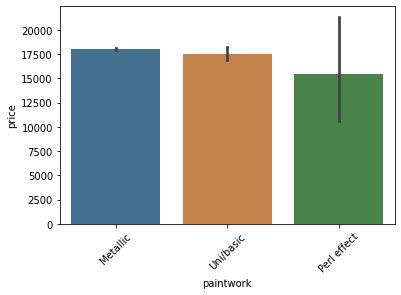

In [52]:
sns.barplot(x="paintwork", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

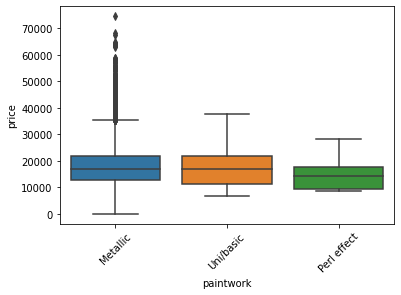

In [53]:
sns.boxplot(x="paintwork", y="price", data=data)
plt.xticks(rotation = 45);

### "body_color_original" sütununda 3774 eksik veri var. Burada eksik değerleri "model", "body_type" ve "registration" göre gruplandırıp bunların price değerlerini incelediğimde ne kadar başka faktörlerde olsa boş olanların fiyatlarının birbirine yakın olduğunu gördüm. Ancak içerideki veri çeşitliliği ve bunun fiyata olabilecek etkisi göz önüne alındığında düşürdüm.

In [49]:
# data["body_color_original"].value_counts(dropna=False).head(50)

NaN                        3774
Onyx Schwarz                389
Bianco                      282
Argon Silber                273
Quarz Grau                  266
Mythosschwarz Metallic      256
wählbar                     237
Brillantschwarz             216
Gris                        204
Nero                        196
Grigio                      191
Licht Grau                  184
Blanco                      155
Tiefsee Blau                139
onyx schwarz                134
Florettsilber Metallic      131
Misanorot Perleffekt        128
Negro                       123
Argento                     120
Lava Rot                    119
SchneeWeiss/SummitWhite     108
Schnee Weiß                  95
Mythosschwarz                94
Argonsilber                  90
Azul                         89
Ibisweiß                     87
Schneeweiß                   84
Nanograu Metallic            84
quarz grau                   82
argon silber                 79
Cortinaweiss                 78
brillant

In [205]:
# data.loc[~data["body_color_original"].notna()].groupby(["model","body_type","registration"])["price"].describe() 

count  \
model    body_type     registration          
A1       Compact       2016.0         46.0   
                       2017.0         46.0   
                       2018.0         14.0   
                       2019.0         32.0   
         Coupe         2016.0          1.0   
...                                    ...   
Insignia Sedans        2019.0         55.0   
         Station wagon 2016.0        128.0   
                       2017.0         72.0   
                       2018.0         32.0   
                       2019.0         46.0   

                                             mean  \
model    body_type     registration                 
A1       Compact       2016.0        14388.043478   
                       2017.0        15852.152174   
                       2018.0        17549.928571   
                       2019.0        20783.343750   
         Coupe         2016.0        13950.000000   
...                                           ...   
Insignia Sedans        2019.0        27893.454545   
         Station wagon 2016.0        13602.656250   
                       2017.0        16469.277778   
                       2018.0        21882.218750   
                       2019.0        28604.173913   

                                             std  \
model    body_type     registration                
A1       Compact       2016.0        1121.298096   
                       2017.0         756.988007   
                       2018.0        2222.278819   
                       2019.0        3058.532883   
         Coupe         2016.0                NaN   
...                                          ...   
Insignia Sedans        2019.0        4540.804753   
         Station wagon 2016.0        2624.521138   
                       2017.0        2848.511251   
                       2018.0        1266.197170   
                       2019.0        4640.041419   

                                         min  \
model    body_type     registration            
A1       Compact       2016.0        10490.0   
                       2017.0        14400.0   
                       2018.0        15700.0   
                       2019.0        16220.0   
         Coupe         2016.0        13950.0   
...                                      ...   
Insignia Sedans        2019.0        19902.0   
         Station wagon 2016.0         8913.0   
                       2017.0        10000.0   
                       2018.0        18900.0   
                       2019.0        21992.0   

                                          25%  \
model    body_type     registration             
A1       Compact       2016.0        13900.00   
                       2017.0        15507.50   
                       2018.0        16137.25   
                       2019.0        19078.00   
         Coupe         2016.0        13950.00   
...                                       ...   
Insignia Sedans        2019.0        24049.50   
         Station wagon 2016.0        11975.00   
                       2017.0        15400.00   
                       2018.0        20974.25   
                       2019.0        24847.50   

                                         50%  \
model    body_type     registration            
A1       Compact       2016.0        14990.0   
                       2017.0        15850.0   
                       2018.0        16900.0   
                       2019.0        20463.0   
         Coupe         2016.0        13950.0   
...                                      ...   
Insignia Sedans        2019.0        27804.0   
         Station wagon 2016.0        13165.0   
                       2017.0        16182.0   
                       2018.0        21900.0   
                       2019.0        27575.0   

                                          75%  \
model    body_type     registration             
A1       Compact       2016.0        14990.00   
                       2017.0       

In [206]:
# data.loc[data["body_color_original"].notna()].groupby(["model","body_type","registration"])["price"].describe() 

count  \
model    body_type     registration          
A1       Compact       2016.0        188.0   
                       2017.0        115.0   
                       2018.0        256.0   
                       2019.0        342.0   
         Other         2017.0          1.0   
...                                    ...   
Insignia Station wagon 2016.0        307.0   
                       2017.0        236.0   
                       2018.0        449.0   
                       2019.0        344.0   
         Van           2018.0          1.0   

                                             mean  \
model    body_type     registration                 
A1       Compact       2016.0        14568.356383   
                       2017.0        16903.069565   
                       2018.0        18628.281250   
                       2019.0        23930.994152   
         Other         2017.0        23490.000000   
...                                           ...   
Insignia Station wagon 2016.0        13760.771987   
                       2017.0        17730.173729   
                       2018.0        22001.351893   
                       2019.0        33437.296512   
         Van           2018.0        20980.000000   

                                             std  \
model    body_type     registration                
A1       Compact       2016.0        2057.016149   
                       2017.0        2357.774321   
                       2018.0        2679.038992   
                       2019.0        3332.321228   
         Other         2017.0                NaN   
...                                          ...   
Insignia Station wagon 2016.0        2187.072985   
                       2017.0        2544.392247   
                       2018.0        1737.389396   
                       2019.0        4801.730723   
         Van           2018.0                NaN   

                                         min  \
model    body_type     registration            
A1       Compact       2016.0         9950.0   
                       2017.0        10999.0   
                       2018.0        13980.0   
                       2019.0        15550.0   
         Other         2017.0        23490.0   
...                                      ...   
Insignia Station wagon 2016.0         8290.0   
                       2017.0         8990.0   
                       2018.0        17500.0   
                       2019.0        19900.0   
         Van           2018.0        20980.0   

                                         25%  \
model    body_type     registration            
A1       Compact       2016.0        13400.0   
                       2017.0        15465.0   
                       2018.0        16445.0   
                       2019.0        21392.5   
         Other         2017.0        23490.0   
...                                      ...   
Insignia Station wagon 2016.0        12485.0   
                       2017.0        15965.0   
                       2018.0        20850.0   
                       2019.0        29987.5   
         Van           2018.0        20980.0   

                                         50%  \
model    body_type     registration            
A1       Compact       2016.0        13965.0   
                       2017.0        15960.0   
                       2018.0        16980.0   
                       2019.0        22885.0   
         Other         2017.0        23490.0   
...                                      ...   
Insignia Station wagon 2016.0        13970.0   
                       2017.0        17990.0   
                       2018.0        21900.0   
                       2019.0        33899.0   
         Van           2018.0        20980.0   

                                          75%  \
model    body_type     registration             
A1       Compact       2016.0        15982.50   
                       2017.0        18690.00   


In [137]:
# f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler modele göre en çok tercih renkler ile dolduruldum.

# data["body_color_original"] = data["body_color_original"].fillna(data.groupby(["model"])["body_color_original"].transform(f))

IndexError: single positional indexer is out-of-bounds

In [19]:
# data.drop("body_color_original", axis=1, inplace=True) 

### "upholstery" sütununda 3720 eksik veri var. Ancak bazı değerlerin holstery ile ilgili değilde daha çok interior color ile ilgili olmasından dolayı bunların yerine np.nan atadım. Ve sonrasında eksikdeğer sayısı 4503 oldu. Sonrasında ise eksik değerleri  "model" göre "holstery" mode() ile doldurdum.

In [210]:
# data["upholstery"].value_counts(dropna=False).head(50)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
White              2
Blue               2
Name: upholstery, dtype: int64

In [19]:
data.loc[~((data["upholstery"]=="Cloth") | (data["upholstery"]=="Full leather") |(data["upholstery"]=="Part leather")|(data["upholstery"]=="Other")|(data["upholstery"]=="Velour") |(data["upholstery"]=="alcantara")), "upholstery"] = np.nan

In [232]:
# data["upholstery"].value_counts(dropna=False).head(50)

Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery, dtype: int64

In [21]:
f= lambda x : x.mode().iloc[0]  

data["upholstery"]= data["upholstery"].fillna(data.groupby(["model"])["upholstery"].transform(f))

In [234]:
# data["upholstery"].value_counts(dropna=False).head(50)

Cloth           12552
Part leather     1499
Full leather     1383
Other             368
Velour             60
alcantara          57
Name: upholstery, dtype: int64

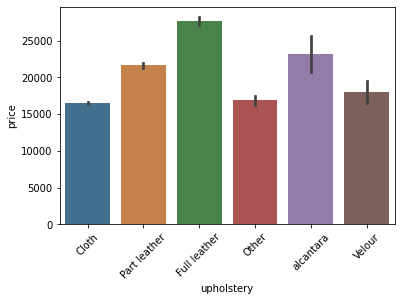

In [57]:
sns.barplot(x="upholstery", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

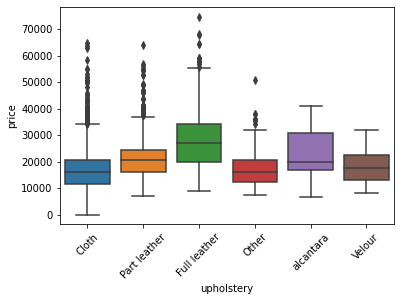

In [58]:
sns.boxplot(x="upholstery", y="price", data=data)
plt.xticks(rotation = 45);

### "interior_color" sütununda 7710 eksik veri var. Eksik veri oranı yüksek. Bu feature düşürdüm.

In [21]:
# data["interior_color"].value_counts(dropna=False).head(50)

Black     7710
NaN       5870
Grey      1103
Other      960
Brown      195
Beige       51
Blue        14
White       11
Yellow       4
Orange       1
Name: interior_color, dtype: int64

In [22]:
# data.drop("interior_color", axis=1, inplace=True)

### "door_nr" sütununda 212 eksik veri var. "Model" göre en yüksek değer ile doldurdum. Ğrup sayısını azaltmak için 7 kapılı olanı 5, 1 kapılı olanı ise 2 ye atarak değişken sayısını düşürdüm.

In [236]:
# data["door_nr"].value_counts(dropna=False).head(50)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: door_nr, dtype: int64

In [22]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler modele göre en çok tercih edilen door_nr ile dolduruldum.

data["door_nr"]= data["door_nr"].fillna(data.groupby(["model"])["door_nr"].transform(f))  # "body_type" da ilave edilebilir.


In [ ]:
# data["door_nr"]= data["door_nr"].fillna(data.groupby(["model"])["door_nr"].transform("mean")) yaptığımızda mode() farklı olarak 5 ve 4 te 30 artıp azalıyor. 

In [23]:
data.loc[data["door_nr"]==7,"door_nr"] = 5

In [24]:
data.loc[data["door_nr"]== 1, "door_nr"] = 2

In [66]:
# data["door_nr"].value_counts(dropna=False).head(50)

5.0    11788
4.0     3079
3.0      832
2.0      220
Name: door_nr, dtype: int64

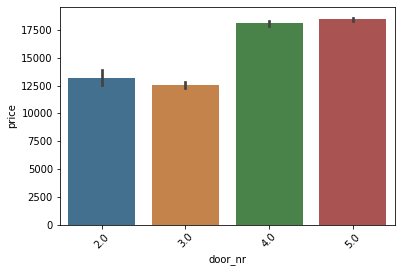

In [67]:
sns.barplot(x="door_nr", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

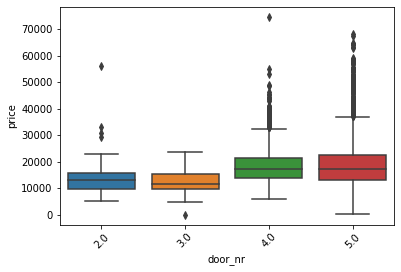

In [68]:
sns.boxplot(x="door_nr", y="price", data=data)
plt.xticks(rotation = 45);

### "seat_nr" sütununda 975 eksik veri var. "Model" bazında "seat_nr" mode() ile doldurdum. Sonrasında ise 6 koltuk olanı 5, 3 koltuk olanı ise 4 ye atarak değişken sayısını düşürdüm.

In [4]:
# data["seat_nr"].value_counts(dropna=False).head(50)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: seat_nr, dtype: int64

In [25]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerleri modele göre en çok tercih seat_nr ile dolduruldum.

data["seat_nr"]= data["seat_nr"].fillna(data.groupby(["model"])["seat_nr"].transform(f))

In [57]:
# data["seat_nr"].value_counts(dropna=False).head(50)

5.0    14313
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: seat_nr, dtype: int64

In [26]:
data.loc[data["seat_nr"]==3, "seat_nr"] = 4

In [27]:
data.loc[data["seat_nr"]==6, "seat_nr"] = 5

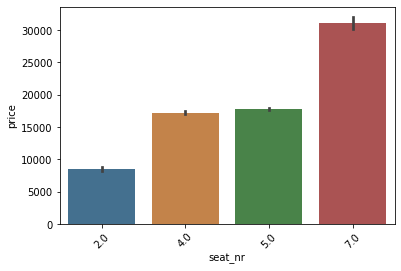

In [72]:
sns.barplot(x="seat_nr", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

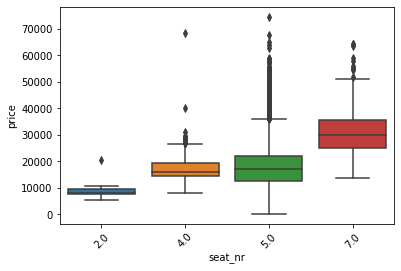

In [73]:
sns.boxplot(x="seat_nr", y="price", data=data)
plt.xticks(rotation = 45);

### "model_code" sütununda 10941 eksik veri var. Drop yaptım.

In [29]:
# data.drop("model_code", axis=1, inplace=True)

### "gear" sütununda eksik veri yok.

In [60]:
# data["gear"].value_counts(dropna=False).head(50)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gear, dtype: int64

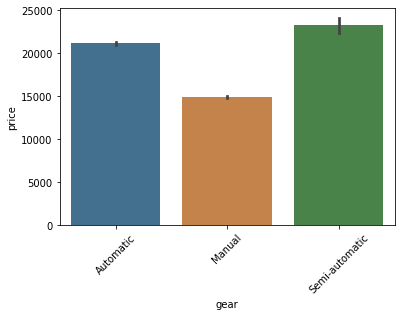

In [76]:
sns.barplot(x="gear", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

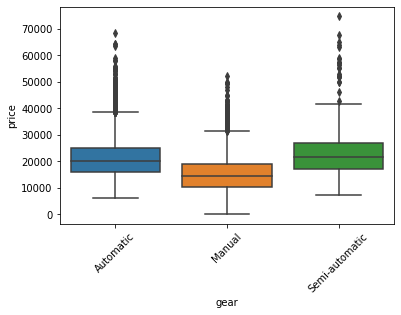

In [77]:
sns.boxplot(x="gear", y="price", data=data)
plt.xticks(rotation = 45);

### "displacement" sütununda 535 eksik veri var. "model", "body_type" ve "registration" bazında"displecement" mean() baktığımızda 800-2500 arasında çıktığını gördüm. Bu aralığın dışında olan değerlerin yerine np.nan atandı. Daha sonra "Model" bazında "displacement" mode() ile doldurdum.

In [80]:
# data["displacement"].value_counts(dropna=False).tail(70)

1,956     670
1,461     595
1,490     559
NaN       535
1,422     467
1,197     353
898       351
1,395     320
1,968     301
1,149     288
1,618     212
1,798     210
1,498     196
1,600     130
1,248     110
1,997     103
1,364     102
1,400      90
998        72
1,500      50
2,000      46
1,000      40
1,998      25
2,480      20
1,200      18
1,984      18
899        11
1,397      11
160         6
929         5
1,499       5
997         4
1,596       4
900         4
139         4
1,396       3
1,199       3
1,599       3
1,589       2
1,300       2
1,495       2
995         2
1,496       1
122         1
2,967       1
1,239       1
1,568       1
1,533       1
15,898      1
140         1
1,995       1
1,350       1
1,686       1
1,369       1
1,333       1
1,896       1
973         1
996         1
16,000      1
1,856       1
890         1
1,584       1
1,368       1
1,390       1
1,696       1
1,580       1
1,100       1
1,195       1
1,800       1
1,198       1
Name: displacement, 

In [28]:
data["displacement"] = data["displacement"].str.replace(",","")

In [29]:
data["displacement"] = data["displacement"].astype("float")

In [33]:
# data.groupby(["model","body_type","registration"])["displacement"].mean().tail(100)

model     body_type      registration
Astra     Sedans         2018.0          1300.541139
                         2019.0          1264.448171
          Station wagon  2016.0          1571.722045
                         2017.0          1543.911111
                         2018.0          1518.351438
                         2019.0          1387.836879
Clio      Compact        2016.0          1347.250000
                         2017.0          1248.397590
                         2018.0          1266.774436
                         2019.0           954.343195
          Coupe          2017.0          1618.000000
          Off-Road       2016.0          1461.000000
                         2019.0          1197.000000
          Other          2016.0          1443.000000
                         2017.0          1341.000000
                         2018.0          1164.700000
                         2019.0           937.333333
          Sedans         2016.0          1367.538043
        

In [30]:
data.loc[(data.displacement > 2500) | (data.displacement <800), "displacement"] = np.nan

In [31]:
f= lambda x : x.mode().iloc[0]    

data["displacement"]= data["displacement"].fillna(data.groupby("model")["displacement"].transform(f))

In [92]:
# data["displacement"].value_counts(dropna=False).head(50)

1598.0    5101
999.0     2467
1398.0    1389
1399.0     749
1461.0     701
1229.0     677
1956.0     670
1490.0     559
1422.0     467
1197.0     353
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     130
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1200.0      18
1984.0      18
899.0       11
1397.0      11
1499.0       5
929.0        5
1596.0       4
997.0        4
900.0        4
1396.0       3
1199.0       3
1599.0       3
1589.0       2
995.0        2
1300.0       2
1495.0       2
1390.0       1
1584.0       1
1568.0       1
1368.0       1
890.0        1
1239.0       1
Name: displacement, dtype: int64

<AxesSubplot:>

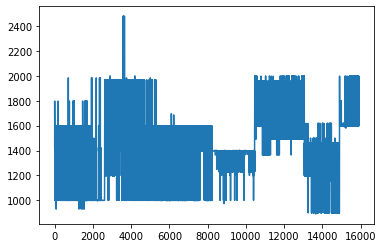

In [93]:
data["displacement"].plot()

### "cylinders" sütununda 5689 eksik veri var. "Model" ve "body_type"  göre "cylinders" mean() ile doldurdum ve sonra np.round ile yuvarladım. Daha sonra 1 ve 2 olanları 3 e, 6 ve 8 olanları ise 5 atadım.

In [94]:
# data["cylinders"].value_counts(dropna=False).head(50)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [32]:
f= lambda x : x.mean()    # Bunun ile eksik değerler modele göre en çok displacement ile doldurdum.

data["cylinders"]= data["cylinders"].fillna(data.groupby(["model","body_type"])["cylinders"].transform(f)).apply(np.round)

In [33]:
data["cylinders"] = data["cylinders"].fillna(method="ffill")

In [34]:
data.loc[data.cylinders < 3, "cylinders"] = 3
data.loc[data.cylinders > 5, "cylinders"] = 5

In [100]:
# data["cylinders"].value_counts(dropna=False)

4.0    12925
3.0     2967
5.0       27
Name: cylinders, dtype: int64

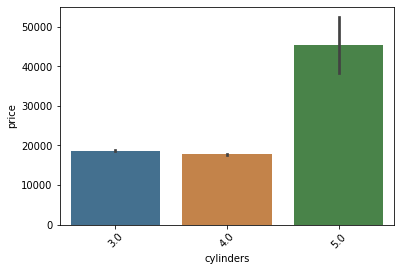

In [37]:
sns.barplot(x="cylinders", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

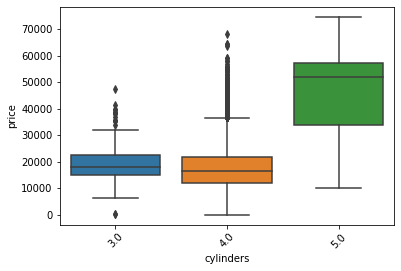

In [102]:
sns.boxplot(x="cylinders", y="price", data=data)
plt.xticks(rotation = 45);

### "weight" sütununda 6976 eksik veri var. "body_type" göre "weight" mode() ile doldurdum.

In [35]:
data["weight"]= data["weight"].str.replace(",","").astype("float")

In [39]:
# data["weight"].value_counts(dropna=False).tail(80)

1870.0    1
840.0     1
1150.0    1
1343.0    1
1181.0    1
1430.0    1
1281.0    1
1791.0    1
2240.0    1
1598.0    1
1058.0    1
1761.0    1
1939.0    1
1143.0    1
1420.0    1
2295.0    1
1705.0    1
1720.0    1
1650.0    1
1030.0    1
1397.0    1
1885.0    1
1333.0    1
1507.0    1
1294.0    1
1258.0    1
1291.0    1
1277.0    1
1505.0    1
1213.0    1
1217.0    1
1648.0    1
1167.0    1
1252.0    1
1713.0    1
1206.0    1
1189.0    1
1905.0    1
1366.0    1
1724.0    1
1257.0    1
1649.0    1
1382.0    1
2044.0    1
1267.0    1
1645.0    1
2355.0    1
1492.0    1
1785.0    1
1591.0    1
1283.0    1
1169.0    1
1792.0    1
2110.0    1
1575.0    1
1254.0    1
1819.0    1
1374.0    1
1548.0    1
1565.0    1
1471.0    1
1302.0    1
1161.0    1
1379.0    1
1711.0    1
1891.0    1
1394.0    1
1017.0    1
1009.0    1
1132.0    1
1847.0    1
1797.0    1
1950.0    1
900.0     1
1272.0    1
1476.0    1
1589.0    1
1555.0    1
1683.0    1
1159.0    1
Name: weight, dtype: int64

In [36]:
f= lambda x : x.mode().iloc[0]    

data["weight"]= data["weight"].fillna(data.groupby(["body_type"])["weight"].transform(f))

In [191]:
# data["weight"].value_counts(dropna=False)

1163.0    5332
1487.0    1913
1734.0     573
1360.0     356
1165.0     301
          ... 
1797.0       1
1950.0       1
900.0        1
1272.0       1
1159.0       1
Name: weight, Length: 433, dtype: int64

<AxesSubplot:>

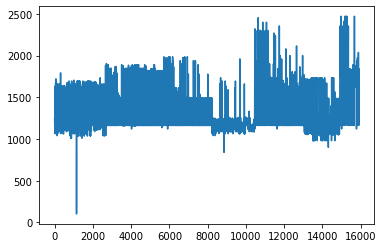

In [107]:
data["weight"].plot()

<AxesSubplot:xlabel='weight'>

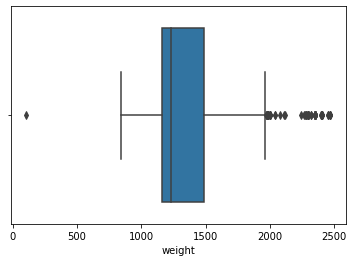

In [37]:
sns.boxplot(x=data.weight)

### "fuel" sütununda eksik veri yok. Burada tüm veriyi 4 grupta topladım.

In [192]:
# data["fuel"].value_counts(dropna=False).head(50)

benzine     8551
Diesel      7299
LPG/CNG       53
Liquid        10
Electric       5
Domestic       1
Name: fuel, dtype: int64

In [38]:
data.loc[data["fuel"]== "LPG/CNG","fuel"] = "lpg"
data.loc[data["fuel"]== "Domestic","fuel"] = "lpg"
data.loc[data["fuel"]== "Liquid","fuel"] = "lpg"

In [197]:
# data["fuel"].value_counts(dropna=False).head(50)

benzine     8551
Diesel      7299
lpg           64
Electric       5
Name: fuel, dtype: int64

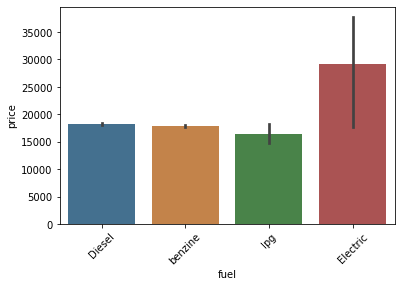

In [109]:
sns.barplot(x="fuel", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

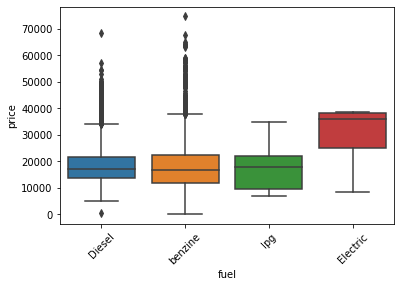

In [110]:
sns.boxplot(x="fuel", y="price", data=data)
plt.xticks(rotation = 45);

### "consumption_comb" sütununda 1925 eksik veri var. Bazı olağan dışından yüksek ve düşük veriler vardı. Bunları inceledikten sonra "model" ve "registration" bazında "consumption_comb" mean() bakarak 4 ve 10 arasında toplandığını gördüm. ve bunların dışında kalan değerleri np.nan ile atadım. Sonrasında ise "body_type" ve "cylinders" göre "consumption_comb" mean() ile doldurdum.

In [36]:
# data["consumption_comb"].value_counts(dropna=False).head(50)

NaN     1925
5.4      770
3.9      733
4.0      714
5.1      657
4.4      623
5.6      618
4.7      602
3.8      585
5.0      551
4.8      546
4.5      526
5.2      455
4.6      445
4.2      435
4.9      393
5.5      380
5.3      380
5.9      369
3.7      369
4.1      342
5.7      342
6.0      331
3.3      326
4.3      307
3.5      307
6.2      216
3.6      194
6.3      181
6.1      175
5.8      164
6.6      148
3.4      143
6.8      136
6.4       75
3.0       69
7.4       66
6.7       45
6.5       43
7.1       39
10.0      34
6.9       27
3.2       25
8.3       20
7.6       14
7.0       10
3.1        7
7.8        6
7.2        6
8.0        5
Name: consumption_comb, dtype: int64

In [155]:
# data.groupby(["model","registration"])["consumption_comb"].mean()

model     registration
A1        2016.0          4.222576
          2017.0          4.283463
          2018.0          4.241818
          2019.0          4.994333
A2        2018.0          4.900000
A3        2016.0          4.213738
          2017.0          4.245013
          2018.0          4.438116
          2019.0          4.730565
Astra     2016.0          4.367798
          2017.0          4.307098
          2018.0          4.830202
          2019.0          5.282581
Clio      2016.0          4.342644
          2017.0          4.624801
          2018.0          5.125651
          2019.0          5.085392
Corsa     2016.0          5.011060
          2017.0          5.180911
          2018.0          5.400180
          2019.0          5.857137
Duster    2019.0          9.680450
Espace    2016.0          4.884412
          2017.0          5.488924
          2018.0          5.488044
          2019.0          6.048798
Insignia  2016.0          4.929927
          2017.0          4.9758

In [39]:
data.loc[ (data.consumption_comb>10) | (data.consumption_comb<4), "consumption_comb"] = np.nan

In [40]:
f= lambda x : x.mean()   

data["consumption_comb"]= data["consumption_comb"].fillna(data.groupby(["body_type","cylinders"])["consumption_comb"].transform(f))

In [158]:
# data["consumption_comb"].value_counts(dropna=False).tail(50)

4.636667     280
5.461717     269
5.237677     223
6.200000     216
6.300000     181
6.100000     175
4.622297     170
5.800000     164
6.600000     148
5.541970     146
6.800000     136
4.563271      92
6.400000      75
7.400000      66
4.894419      57
6.700000      45
6.500000      43
4.491709      42
7.100000      39
5.069122      35
10.000000     34
6.900000      27
4.642187      21
8.300000      21
7.600000      14
7.000000      10
4.650000      10
4.777447       9
4.764114       6
4.780000       6
7.200000       6
5.212000       6
7.800000       6
4.712037       5
8.000000       5
8.600000       4
8.135294       4
7.900000       3
8.700000       3
8.100000       2
8.400777       2
7.300000       2
NaN            1
8.136842       1
9.100000       1
7.500000       1
7.600000       1
5.491711       1
5.157143       1
4.566667       1
Name: consumption_comb, dtype: int64

In [41]:
data["consumption_comb"] = data["consumption_comb"].fillna(method="ffill")  # 1 tane nan değer vardı onları doldurdum.

In [42]:
data["consumption_comb"] = np.round(data["consumption_comb"], 1)

<AxesSubplot:>

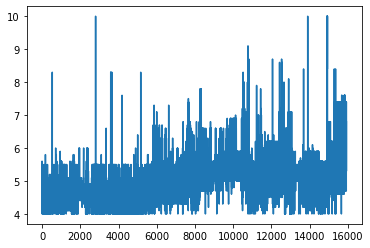

In [43]:
data["consumption_comb"].plot()

<AxesSubplot:xlabel='consumption_comb'>

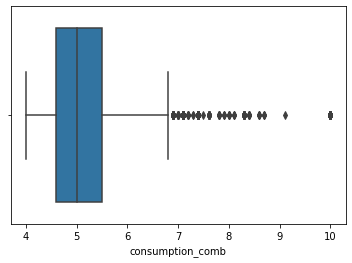

In [44]:
sns.boxplot(x=data.consumption_comb)

### "CO2_emission" sütununda 2436 eksik veri var. Bazı olağandan yüksek ve düşük veriler vardı. Bunları inceledikten sonra "model" ve "body_type" bazında "CO2_emission" mean() bakarak 80 ve 200 arasında toplandığını gördüm. Ve bunların dışında kalan değerlere np.nan ile atadım.  Sonrasında "body_type" ve "cylinders" göre "CO2_emission" mean() ile doldurdum.

In [203]:
# data["CO2_emission"].value_counts(dropna=False).head(50)

NaN      2436
120.0     740
99.0      545
97.0      537
104.0     501
102.0     477
103.0     445
114.0     382
124.0     372
108.0     362
107.0     362
119.0     361
106.0     349
128.0     329
126.0     282
85.0      275
118.0     270
110.0     266
127.0     257
117.0     254
111.0     237
113.0     235
109.0     234
139.0     224
140.0     218
129.0     213
135.0     202
105.0     202
92.0      198
130.0     180
123.0     178
150.0     174
112.0     171
143.0     171
95.0      161
116.0     157
141.0     156
98.0      151
133.0     145
136.0     145
137.0     133
125.0     132
134.0     130
145.0     126
149.0     117
153.0     113
147.0     109
101.0     105
132.0     100
115.0      86
Name: CO2_emission, dtype: int64

In [161]:
# data.groupby(["model","body_type"])["CO2_emission"].mean()

model     body_type    
A1        Compact          106.398099
          Coupe             97.000000
          Other            107.375000
          Sedans           102.979669
          Station wagon    103.800000
          Van                     NaN
A2        Off-Road                NaN
A3        Compact          109.213740
          Convertible      123.857143
          Coupe            100.750000
          Other            108.750000
          Sedans           108.879008
          Station wagon    110.722008
Astra     Compact          107.383838
          Coupe            144.000000
          Off-Road         128.000000
          Other            112.085106
          Sedans           116.177704
          Station wagon    115.320736
Clio      Compact          114.941476
          Coupe            140.000000
          Off-Road         125.000000
          Other            115.600000
          Sedans           111.614489
          Station wagon    108.245734
          Transporter     

In [ ]:
# data.loc[(data.CO2_emission>200) | (data.CO2_emission<80)]

In [45]:
data.loc[ (data.CO2_emission>200) | (data.CO2_emission<80), "CO2_emission"] = np.nan

In [46]:
f= lambda x : x.mean()    # Bunun ile eksik değerler modele göre en çok displacement ile doldurdum.

data["CO2_emission"]= data["CO2_emission"].fillna(data.groupby(["body_type","cylinders"])["CO2_emission"].transform(f))

In [ ]:
# data["CO2_emission"].value_counts(dropna=False).tail(50)

In [47]:
data["CO2_emission"] = data["CO2_emission"].fillna(method="ffill")  # 2 tane eksik değeri doldurdum.

In [48]:
data["CO2_emission"] = np.round(data["CO2_emission"], 1)

In [70]:
# data["CO2_emission"].value_counts(dropna=False).tail(50)

172.0    25
96.0     22
89.0     19
189.0    19
157.0    18
158.0    17
169.0    15
88.0     15
156.0    14
164.0    13
161.0    10
170.0    10
175.0     8
166.0     8
155.0     8
159.0     7
188.0     7
174.0     6
87.0      6
197.0     4
12.0      4
194.0     3
36.0      3
5.0       3
199.0     2
84.0      2
162.0     2
0.0       2
1.0       2
191.0     2
14.0      2
167.0     2
160.0     1
183.0     1
331.0     1
180.0     1
253.0     1
190.0     1
181.0     1
80.0      1
177.0     1
165.0     1
193.0     1
239.0     1
13.0      1
171.0     1
184.0     1
51.0      1
990.0     1
45.0      1
Name: CO2_emission, dtype: int64

<AxesSubplot:>

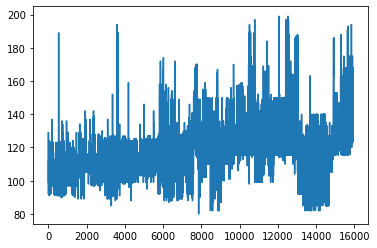

In [166]:
# data["CO2_emission"].plot()

<AxesSubplot:xlabel='CO2_emission'>

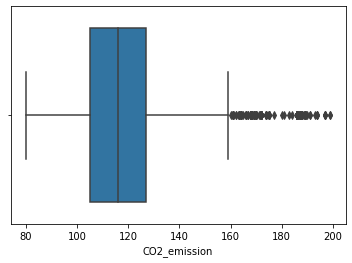

In [49]:
sns.boxplot(x=data.CO2_emission)

### "emission_class" sütununda 3628 eksik veri var. "body_type" göre "emission_class" mean() ile doldurdum.

In [167]:
# data["emission_class"].value_counts(dropna=False).head(50)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [50]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler body_type göre emission_class mode() ile doldurdum.

data["emission_class"] = data["emission_class"].fillna(data.groupby(["body_type"])["emission_class"].transform(f))

In [169]:
# data["emission_class"].value_counts(dropna=False).head(50)

Euro 6          13757
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             50
Name: emission_class, dtype: int64

In [215]:
# data.loc[data["emission_class"].notna()].groupby(["model","body_type"])["registration"].describe() 

count  \
model    body_type               
A1       Compact         857.0   
         Coupe             1.0   
         Other             4.0   
         Sedans         1173.0   
         Station wagon    19.0   
A2       Off-Road          1.0   
A3       Compact         131.0   
         Convertible       7.0   
         Coupe             4.0   
         Other            11.0   
         Sedans         2217.0   
         Station wagon   246.0   
Astra    Compact         101.0   
         Coupe             1.0   
         Off-Road          1.0   
         Other            45.0   
         Sedans          786.0   
         Station wagon   950.0   
Clio     Compact         324.0   
         Coupe             1.0   
         Off-Road          2.0   
         Other            26.0   
         Sedans          716.0   
         Station wagon   272.0   
         Transporter      10.0   
Corsa    Compact         944.0   
         Coupe            11.0   
         Off-Road          3.0   
         Other            73.0   
         Sedans          702.0   
         Transporter       6.0   
Duster   Off-Road         32.0   
Espace   Compact           3.0   
         Off-Road          5.0   
         Other             6.0   
         Sedans           14.0   
         Station wagon    83.0   
         Transporter      46.0   
         Van             530.0   
Insignia Compact          18.0   
         Off-Road          2.0   
         Other            36.0   
         Sedans          603.0   
         Station wagon  1268.0   

                               mean  \
model    body_type                    
A1       Compact        2017.738623   
         Coupe          2016.000000   
         Other          2018.250000   
         Sedans         2017.449275   
         Station wagon  2017.473684   
A2       Off-Road       2018.000000   
A3       Compact        2016.732824   
         Convertible    2017.285714   
         Coupe          2016.250000   
         Other          2017.545455   
         Sedans         2017.488949   
         Station wagon  2017.678862   
Astra    Compact        2017.386139   
         Coupe          2019.000000   
         Off-Road       2018.000000   
         Other          2017.733333   
         Sedans         2017.688295   
         Station wagon  2017.403158   
Clio     Compact        2017.719136   
         Coupe          2017.000000   
         Off-Road       2017.500000   
         Other          2017.653846   
         Sedans         2017.534916   
         Station wagon  2017.205882   
         Transporter    2017.300000   
Corsa    Compact        2018.005297   
         Coupe          2016.909091   
         Off-Road       2017.000000   
         Other          2017.904110   
         Sedans         2017.531339   
         Transporter    2017.500000   
Duster   Off-Road       2019.000000   
Espace   Compact        2017.000000   
         Off-Road       2017.000000   
         Other          2017.333333   
         Sedans         2018.142857   
         Station wagon  2016.879518   
         Transporter    2016.456522   
         Van            2017.575472   
Insignia Compact        2018.222222   
         Off-Road       2017.500000   
         Other          2017.222222   
         Sedans         2017.611940   
         Station wagon  2017.485016   

                             std  \
model    body_type                 
A1       Compact        1.166837   
         Coupe               NaN   
         Other          0.500000   
         Sedans         1.102368   
         Station wagon  0.904828   
A2       Off-Road            NaN   
A3       Compact        0.934998   
         Convertible    0.755929   
         Coupe          0.500000   
         Other          1.213560   
         Sedans         1.101357   
         Station wagon  1.214924   
Astra    Compact        0.989649   
         Coupe               NaN   
         Off-Road            NaN   
         Other          0.809040   
         Sedans  

In [ ]:
# data.loc[~data["emission_class"].notna()].groupby(["model","body_type"])["registration"].describe() 

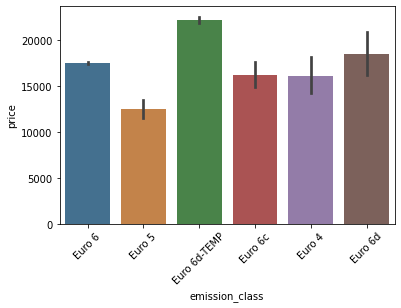

In [170]:
sns.barplot(x="emission_class", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

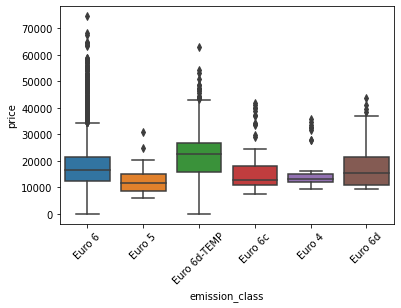

In [171]:
sns.boxplot(x="emission_class", y="price", data=data)
plt.xticks(rotation = 45);

### "gears" sütununda  4712 eksik veri var. Bazı olağandan yüksek ve düşük veriler vardı. Bunları inceledikten sonra "model","body_type","registration" bazında "gears" mean() ile bakarak 5 ve 7 arasında toplandığını gördüm. Bunların dışında kalan değerlerden 8 olanın gerçek hayatta insignia modeline ait olanının olduğunu gördüm. Bu model dışında kalan değerlere np.nan ile atadım. Sonrasında ise "body_type" göre "gears" mode() ile doldurdum.

In [98]:
# data["gears"].value_counts(dropna=False).head(50)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
4.0        2
1.0        2
3.0        2
50.0       1
2.0        1
Name: gears, dtype: int64

In [50]:
# data.loc[(data["gears"]>7) | (data["gears"]<5)]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,upholstery,door_nr,seat_nr,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security,gears
215,Audi,A1,Compact,1.0,16880,VAT deductible,6680.0,2017.0,1.0,70.0,Used,1.0,Yes,Blue,Metallic,Cloth,5.0,4.0,Automatic,999.0,3.0,1163.0,benzine,4.40000,5.2,3.9,104.00000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",8.0
1033,Audi,A1,Sedans,1.0,20500,VAT deductible,3000.0,2018.0,1.0,60.0,Employee's car,1.0,No,Grey,Metallic,Cloth,5.0,5.0,Automatic,999.0,4.0,1650.0,benzine,4.90000,5.6,4.5,129.00000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Voice Control...","ABS,Adaptive Cruise Control,Alarm system,Centr...",8.0
8921,Opel,Corsa,Compact,1.4,11000,VAT deductible,24000.0,2018.0,1.0,66.0,Used,1.0,No,Blue,Metallic,Cloth,5.0,5.0,Semi-automatic,1398.0,4.0,1163.0,benzine,4.80000,5.8,4.1,112.00000,Euro 6d,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.0
9812,Opel,Corsa,Sedans,1.2,9880,VAT deductible,19247.0,2018.0,1.0,51.0,Used,NaN,No,Grey,Metallic,Cloth,5.0,5.0,Manual,1229.0,4.0,1163.0,benzine,5.04536,NaN,NaN,115.26864,Euro 6,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.0
10151,Opel,Corsa,Compact,1.4,14770,VAT deductible,5.0,2019.0,0.0,66.0,New,NaN,No,Grey,Metallic,Cloth,4.0,5.0,Automatic,1398.0,4.0,1163.0,benzine,5.90000,7.5,5.1,136.00000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrically h...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15824,Renault,Espace,Van,1.8,52711,VAT deductible,11.0,2019.0,0.0,165.0,New,NaN,No,Grey,Metallic,Part leather,5.0,5.0,Automatic,1798.0,4.0,1608.0,benzine,7.40000,9.2,6.3,135.87563,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0
15827,Renault,Espace,Van,1.8,52711,VAT deductible,11.0,2019.0,0.0,165.0,New,NaN,No,Grey,Metallic,Part leather,5.0,5.0,Automatic,1798.0,4.0,1608.0,benzine,7.40000,9.2,6.3,135.87563,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0
15845,Renault,Espace,Van,2.0,46660,VAT deductible,11.0,2019.0,0.0,118.0,New,NaN,No,White,Metallic,Part leather,5.0,5.0,Automatic,1997.0,4.0,1733.0,Diesel,5.10000,5.7,4.8,135.87563,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0
15869,Renault,Espace,Van,2.0,49100,VAT deductible,11.0,2019.0,0.0,146.0,New,NaN,No,White,Metallic,Part leather,5.0,5.0,Automatic,1997.0,4.0,1740.0,Diesel,5.30000,6.2,4.7,135.87563,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0


In [53]:
# data.groupby(["model","body_type","registration"])["gears"].mean().tail(50)

model     body_type      registration
Corsa     Van            2016.0               NaN
Duster    Off-Road       2019.0          6.000000
Espace    Compact        2016.0          7.000000
                         2017.0               NaN
                         2019.0          6.000000
          Coupe          2018.0               NaN
                         2019.0               NaN
          Off-Road       2016.0               NaN
                         2017.0          6.000000
                         2018.0          5.000000
          Other          2016.0          6.500000
                         2017.0          6.000000
                         2018.0          6.000000
                         2019.0               NaN
          Sedans         2016.0          7.000000
                         2017.0               NaN
                         2018.0          6.400000
                         2019.0               NaN
          Station wagon  2016.0          6.104167
            

In [51]:
data.loc[((data["gears"]==8) & (data["model"]!="Insignia")) | (data["gears"]< 5) | (data["gears"]>8), "gears"] = np.nan

In [53]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler body_type göre emission_class mode() ile doldurdum.

data["gears"] = data["gears"].fillna(data.groupby(["body_type"])["gears"].transform(f))

In [102]:
# data["gears"].value_counts(dropna=False).head(50)

6.0    9514
5.0    4494
7.0    1908
8.0       3
Name: gears, dtype: int64

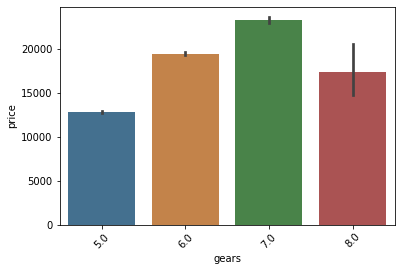

In [101]:
sns.barplot(x="gears", y="price", data=data, saturation=0.5)
plt.xticks(rotation = 45);

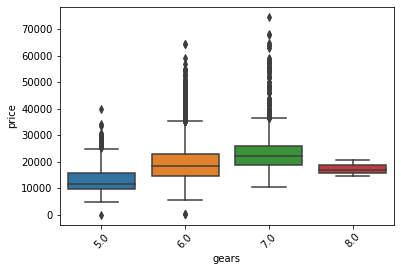

In [103]:
sns.boxplot(x="gears", y="price", data=data)
plt.xticks(rotation = 45);

### "comfort_convenience" sütununda 920 eksik veri var. body_type göre mode() ile doldurdum.

In [234]:
# data["comfort_convenience"].value_counts(dropna=False).head(50)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                             216
Air conditioning,Electrical side m

In [51]:
f= lambda x : x.mode().iloc[0]    

data["comfort_convenience"] = data["comfort_convenience"].fillna(data.groupby(["body_type"])["comfort_convenience"].transform(f))

In [239]:
# data["comfort_convenience"].value_counts(dropna=False).head(50)

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                             468
Air conditioning,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                                                 436
Air conditioning,Cruise control,Hi

In [52]:
comfort = data["comfort_convenience"].str.get_dummies(sep=",")

data = data.join(comfort)  # bunu en son çalıştıralım.

In [53]:
data.drop("comfort_convenience", axis=1, inplace=True)

### "entertainment" sütununda 1374 eksik veri var. body_type göre mode() ile doldurdum.

In [240]:
# data["entertainment"].value_counts(dropna=False).head(50)

NaN                                                                                                    1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                             1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                          982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                783
On-board computer,Radio                                                                                 487
Radio                                                                                                   477
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                    465
On-board computer                                                                                       461
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio                                    404
Bluetooth,On-board computer,

In [54]:
f= lambda x : x.mode().iloc[0]    

data["entertainment"] = data["entertainment"].fillna(data.groupby(["body_type"])["entertainment"].transform(f))

In [55]:
# data["entertainment"].value_counts(dropna=False).head(50)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                             1995
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                         1308
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                783
Bluetooth,Hands-free equipment,On-board computer,Radio                                                  513
On-board computer,Radio                                                                                 487
Radio                                                                                                   477
On-board computer                                                                                       466
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                    465
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio                                    404
Bluetooth,On-board computer,

In [56]:
entertainment = data["entertainment"].str.get_dummies(sep=",")

data = data.join(entertainment)  # bunu en son çalıştıralım.

In [57]:
data.drop("entertainment", axis=1, inplace=True)

### "Extras" sütununda 2962 eksik veri var. body_type göre mode() ile doldurdum.

In [244]:
# data["Extras"].value_counts(dropna=False).head(50)

Alloy wheels                                                                                        3245
NaN                                                                                                 2962
Alloy wheels,Touch screen                                                                            697
Alloy wheels,Voice Control                                                                           577
Alloy wheels,Touch screen,Voice Control                                                              541
Alloy wheels,Roof rack                                                                               385
Alloy wheels,Sport seats                                                                             380
Roof rack                                                                                            337
Alloy wheels,Catalytic Converter                                                                     271
Alloy wheels,Sport seats,Sport suspension              

In [58]:
f= lambda x : x.mode().iloc[0]    

data["Extras"] = data["Extras"].fillna(data.groupby(["body_type"])["Extras"].transform(f))

In [246]:
data["Extras"].value_counts(dropna=False).head(50)

Alloy wheels                                                                                        5903
Alloy wheels,Touch screen                                                                            697
Roof rack                                                                                            641
Alloy wheels,Voice Control                                                                           577
Alloy wheels,Touch screen,Voice Control                                                              541
Alloy wheels,Roof rack                                                                               385
Alloy wheels,Sport seats                                                                             380
Alloy wheels,Catalytic Converter                                                                     271
Alloy wheels,Sport seats,Sport suspension                                                            234
Alloy wheels,Catalytic Converter,Touch screen          

In [59]:
ekstra = data["Extras"].str.get_dummies(sep=",")

data = data.join(ekstra)  # bunu en son çalıştıralım.

In [60]:
data.drop("Extras", axis=1, inplace=True)

### "safety_security" sütununda 982 eksik veri var. body_type göre mode() ile doldurdum.

In [247]:
# data["safety_security"].value_counts(dropna=False).head(50)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                       982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                              538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressu

In [61]:
f= lambda x : x.mode().iloc[0]    

data["safety_security"] = data["safety_security"].fillna(data.groupby(["body_type"])["safety_security"].transform(f))

In [249]:
# data["safety_security"].value_counts(dropna=False).head(50)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                              815
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                         609
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressu

In [62]:
safety = data["safety_security"].str.get_dummies(sep=",")

data = data.join(safety)  # bunu en son çalıştıralım.

In [63]:
data.drop("safety_security", axis=1, inplace=True)

### "cc" sütunu "displacement" ile duplicated olduğundan dolayı düşüldü.

In [64]:
data.drop("cc", axis=1, inplace=True)

### "previous_owners" sütunu "prev_owner" ile duplicated olduğundan dolayı düşüldü.

In [65]:
data.drop("previous_owners", axis=1, inplace=True)

### "body_color_original" sütunu düşüldü.

In [66]:
data.drop("body_color_original", axis=1, inplace=True)

### "interior_color" sütunu düşüldü.

In [67]:
data.drop("interior_color", axis=1, inplace=True)

### "model_code" sütunu düşüldü.

In [68]:
data.drop("model_code", axis=1, inplace=True)

### "consumption_city" sütunu düşüldü.

In [69]:
data.drop("consumption_city", axis=1, inplace=True)

### "consumption_country" sütunu düşüldü.

In [70]:
data.drop("consumption_country", axis=1, inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 119 entries, make to Xenon headlights
dtypes: float64(12), int64(95), object(12)
memory usage: 14.5+ MB


In [72]:
data.isnull().sum().sum()

0

In [73]:
data.to_csv("Autoscout_data_filling-outlier.csv", index=False)